In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1CeuHe-yMRexmmzduDTq2mUcuVRY16wE8'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv') 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dt=pd.read_csv("train.csv")

In [ ]:
dt.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [ ]:
dt['job'].nunique()

12

In [ ]:
#dt.groupby('job').nunique()

In [ ]:
dt.groupby('job')['job'].count()
#dt.groupby('job').size()

job
admin.           3631
blue-collar      6842
entrepreneur     1008
housemaid         874
management       6639
retired          1574
self-employed    1123
services         2903
student           635
technician       5307
unemployed        905
unknown           206
Name: job, dtype: int64

In [ ]:
dt.groupby('marital')['marital'].count()

marital
divorced     3630
married     19095
single       8922
Name: marital, dtype: int64

In [ ]:
dt.groupby('education')['education'].count()

education
primary       4808
secondary    16224
tertiary      9301
unknown       1314
Name: education, dtype: int64

In [ ]:
dt.groupby('default')['default'].count()

default
no     31062
yes      585
Name: default, dtype: int64

In [ ]:
dt.groupby('housing')['housing'].count()

housing
no     14063
yes    17584
Name: housing, dtype: int64

In [ ]:
dt.groupby('loan')['loan'].count()

loan
no     26516
yes     5131
Name: loan, dtype: int64

In [ ]:
dt.groupby('contact')['contact'].count()

contact
cellular     20423
telephone     2047
unknown       9177
Name: contact, dtype: int64

In [ ]:
dt.groupby('month')['month'].count()

month
apr    2055
aug    4333
dec     157
feb    1827
jan     977
jul    4844
jun    3738
mar     342
may    9669
nov    2783
oct     512
sep     410
Name: month, dtype: int64

In [ ]:
dt.groupby('poutcome')['poutcome'].count()

poutcome
failure     3362
other       1288
success     1068
unknown    25929
Name: poutcome, dtype: int64

In [ ]:
dt.groupby('subscribed')['subscribed'].count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

In [ ]:
dt.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [ ]:
dt_new=pd.get_dummies(data=dt, columns=['job', 'marital','education','default','housing','loan','contact','month','poutcome'])

In [ ]:
dt_new.head()

ID  age  balance  day  duration  campaign  pdays  previous subscribed  \
0  26110   56     1933   19        44         2     -1         0         no   
1  40576   31        3   20        91         2     -1         0         no   
2  15320   27      891   18       240         1     -1         0         no   
3  43962   57     3287   22       867         1     84         3        yes   
4  29842   31      119    4       380         1     -1         0         no   

   job_admin.  ...  month_jun  month_mar  month_may  month_nov  month_oct  \
0           1  ...          0          0          0          1          0   
1           0  ...          0          0          0          0          0   
2           0  ...          0          0          0          0          0   
3           0  ...          1          0          0          0          0   
4           0  ...          0          0          0          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 1   
4          0                 0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 0  
4                 1  

[5 rows x 53 columns]

In [ ]:
dt_new.drop(['job_unknown', 'education_unknown','contact_unknown','poutcome_unknown'], axis = 1,inplace=True) 

In [ ]:
dt_new.head()

ID  age  balance  day  duration  campaign  pdays  previous subscribed  \
0  26110   56     1933   19        44         2     -1         0         no   
1  40576   31        3   20        91         2     -1         0         no   
2  15320   27      891   18       240         1     -1         0         no   
3  43962   57     3287   22       867         1     84         3        yes   
4  29842   31      119    4       380         1     -1         0         no   

   job_admin.  ...  month_jul  month_jun  month_mar  month_may  month_nov  \
0           1  ...          0          0          0          0          1   
1           0  ...          1          0          0          0          0   
2           0  ...          1          0          0          0          0   
3           0  ...          0          1          0          0          0   
4           0  ...          0          0          0          0          0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  
0          0          0                 0               0                 0  
1          0          0                 0               0                 0  
2          0          0                 0               0                 0  
3          0          0                 0               0                 1  
4          0          0                 0               0                 0  

[5 rows x 49 columns]

In [ ]:
factors=pd.factorize(dt_new['subscribed'])

In [ ]:
factors

(array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 Index(['no', 'yes'], dtype='object'))

In [ ]:
len(factors[1])

2

In [ ]:
factors[1]

Index(['no', 'yes'], dtype='object')

In [ ]:
dt_new.subscribed=factors[0]

In [ ]:
dt_new

ID  age  balance  day  duration  campaign  pdays  previous  \
0      26110   56     1933   19        44         2     -1         0   
1      40576   31        3   20        91         2     -1         0   
2      15320   27      891   18       240         1     -1         0   
3      43962   57     3287   22       867         1     84         3   
4      29842   31      119    4       380         1     -1         0   
...      ...  ...      ...  ...       ...       ...    ...       ...   
31642  36483   29        0   12       116         2     -1         0   
31643  40178   53      380    5       438         2     -1         0   
31644  19710   32      312    7        37         3     -1         0   
31645  38556   57      225   15        22         7    337        12   
31646  14156   55      204   11      1973         2     -1         0   

       subscribed  job_admin.  ...  month_jul  month_jun  month_mar  \
0               0           1  ...          0          0          0   
1               0           0  ...          1          0          0   
2               0           0  ...          1          0          0   
3               1           0  ...          0          1          0   
4               0           0  ...          0          0          0   
...           ...         ...  ...        ...        ...        ...   
31642           0           0  ...          0          0          0   
31643           1           0  ...          0          1          0   
31644           0           0  ...          0          0          0   
31645           0           0  ...          0          0          0   
31646           1           0  ...          1          0          0   

       month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0              0          1          0          0                 0   
1              0          0          0          0                 0   
2              0          0          0          0                 0   
3              0          0          0          0                 0   
4              0          0          0          0                 0   
...          ...        ...        ...        ...               ...   
31642          1          0          0          0                 0   
31643          0          0          0          0                 0   
31644          0          0          0          0                 0   
31645          1          0          0          0                 1   
31646          0          0          0          0                 0   

       poutcome_other  poutcome_success  
0                   0                 0  
1                   0                 0  
2                   0                 0  
3                   0                 1  
4                   0                 0  
...               ...               ...  
31642               0                 0  
31643               0                 0  
31644               0                 0  
31645               0                 0  
31646               0                 0  

[31647 rows x 49 columns]

In [ ]:
dt_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   31647 non-null  int64
 1   age                  31647 non-null  int64
 2   balance              31647 non-null  int64
 3   day                  31647 non-null  int64
 4   duration             31647 non-null  int64
 5   campaign             31647 non-null  int64
 6   pdays                31647 non-null  int64
 7   previous             31647 non-null  int64
 8   subscribed           31647 non-null  int64
 9   job_admin.           31647 non-null  uint8
 10  job_blue-collar      31647 non-null  uint8
 11  job_entrepreneur     31647 non-null  uint8
 12  job_housemaid        31647 non-null  uint8
 13  job_management       31647 non-null  uint8
 14  job_retired          31647 non-null  uint8
 15  job_self-employed    31647 non-null  uint8
 16  job_services         3

In [ ]:
import pickle
from sklearn.externals import joblib

In [ ]:
joblib.dump(dt_new,"trans_tr_data.pkl")

In [ ]:
clean_train_dt = drive.CreateFile({'parents':[{u'id': '1FRi2c6DlbWX4Bmtxt18N1iDtlS1UcgdM'}]})
clean_train_dt.SetContentFile('trans_tr_data.pkl')
clean_train_dt.Upload() 

In [ ]:
loaded_tr_data=joblib.load("trans_tr_data.pkl")

In [ ]:
loaded_tr_dataa

In [ ]:
type(loaded_tr_data)

In [ ]:
from sklearn import preprocessing    

In [ ]:
dt.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
dt_le=dt.copy()

In [ ]:
dt_le

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [ ]:
#dt_le['job_le']=le.fit_transform(dt_le['job'])
#le_job_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print(le_job_mapping)

In [ ]:
dt_le['marital_le']=le.fit_transform(dt_le['marital'])
le_marital_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_marital_mapping)

{'divorced': 0, 'married': 1, 'single': 2}


In [ ]:
dt_le['default_le']=le.fit_transform(dt_le['default'])
le_default_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_default_mapping)

{'no': 0, 'yes': 1}


In [ ]:
dt_le['housing_le']=le.fit_transform(dt_le['housing'])
le_housing_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_housing_mapping)

{'no': 0, 'yes': 1}


In [ ]:
dt_le['loan_le']=le.fit_transform(dt_le['loan'])
le_loan_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_loan_mapping)

{'no': 0, 'yes': 1}


In [ ]:
dt_le['contact_le']=le.fit_transform(dt_le['contact'])
le_contact_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_contact_mapping)

{'cellular': 0, 'telephone': 1, 'unknown': 2}


In [ ]:
dt_le['month_le']=le.fit_transform(dt_le['month'])
le_month_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_month_mapping)

{'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}


In [ ]:
dt_le['poutcome_le']=le.fit_transform(dt_le['poutcome'])
le_poutcome_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_poutcome_mapping)

{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}


In [ ]:
dt_le['subscribed_le']=le.fit_transform(dt_le['subscribed'])
le_subscribed_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_subscribed_mapping)

{'no': 0, 'yes': 1}


In [ ]:
dt_le

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  ...  poutcome subscribed  marital_le  default_le  \
0       no  telephone  ...   unknown         no           1           0   
1       no   cellular  ...   unknown         no           1           0   
2       no   cellular  ...   unknown         no           1           0   
3       no   cellular  ...   success        yes           0           0   
4       no   cellular  ...   unknown         no           1           0   
...    ...        ...  ...       ...        ...         ...         ...   
31642   no   cellular  ...   unknown         no           2           0   
31643  yes   cellular  ...   unknown        yes           0           0   
31644   no   cellular  ...   unknown         no           2           0   
31645   no  telephone  ...   failure         no           1           0   
31646   no   cellular  ...   unknown        yes           0           0   

       housing_le  loan_le contact_le month_le  poutcome_le  subscribed_le  
0               0        0          1        9            3              0  
1               0        0          0        5            3              0  
2               1        0          0        5            3              0  
3               0        0          0        6            2              1  
4               1        0          0        3            3              0  
...           ...      ...        ...      ...          ...            ...  
31642           1        0          0        8            3              0  
31643           0        1          0        6            3              1  
31644           0        0          0        1            3              0  
31645           1        0          1        8            0              0  
31646           1        0          0        5            3              1  

[31647 rows x 26 columns]

In [ ]:
dt_le.drop(['marital','education','default','housing','loan','contact','month','poutcome','subscribed'], axis = 1,inplace=True) 

In [ ]:
dt_le

ID  age         job  balance  day  duration  campaign  pdays  \
0      26110   56      admin.     1933   19        44         2     -1   
1      40576   31     unknown        3   20        91         2     -1   
2      15320   27    services      891   18       240         1     -1   
3      43962   57  management     3287   22       867         1     84   
4      29842   31  technician      119    4       380         1     -1   
...      ...  ...         ...      ...  ...       ...       ...    ...   
31642  36483   29  management        0   12       116         2     -1   
31643  40178   53  management      380    5       438         2     -1   
31644  19710   32  management      312    7        37         3     -1   
31645  38556   57  technician      225   15        22         7    337   
31646  14156   55  management      204   11      1973         2     -1   

       previous  marital_le  default_le  housing_le  loan_le  contact_le  \
0             0           1           0           0        0           1   
1             0           1           0           0        0           0   
2             0           1           0           1        0           0   
3             3           0           0           0        0           0   
4             0           1           0           1        0           0   
...         ...         ...         ...         ...      ...         ...   
31642         0           2           0           1        0           0   
31643         0           0           0           0        1           0   
31644         0           2           0           0        0           0   
31645        12           1           0           1        0           1   
31646         0           0           0           1        0           0   

       month_le  poutcome_le  subscribed_le  
0             9            3              0  
1             5            3              0  
2             5            3              0  
3             6            2              1  
4             3            3              0  
...         ...          ...            ...  
31642         8            3              0  
31643         6            3              1  
31644         1            3              0  
31645         8            0              0  
31646         5            3              1  

[31647 rows x 17 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [ ]:
dt_final_le=pd.get_dummies(data=dt_le, columns=['job'])

In [ ]:
dt_final_le.drop(['job_unknown'], axis = 1,inplace=True) 

In [ ]:
dt_final_le

ID  age  balance  day  duration  campaign  pdays  previous  \
0      26110   56     1933   19        44         2     -1         0   
1      40576   31        3   20        91         2     -1         0   
2      15320   27      891   18       240         1     -1         0   
3      43962   57     3287   22       867         1     84         3   
4      29842   31      119    4       380         1     -1         0   
...      ...  ...      ...  ...       ...       ...    ...       ...   
31642  36483   29        0   12       116         2     -1         0   
31643  40178   53      380    5       438         2     -1         0   
31644  19710   32      312    7        37         3     -1         0   
31645  38556   57      225   15        22         7    337        12   
31646  14156   55      204   11      1973         2     -1         0   

       marital_le  default_le  ...  job_blue-collar  job_entrepreneur  \
0               1           0  ...                0                 0   
1               1           0  ...                0                 0   
2               1           0  ...                0                 0   
3               0           0  ...                0                 0   
4               1           0  ...                0                 0   
...           ...         ...  ...              ...               ...   
31642           2           0  ...                0                 0   
31643           0           0  ...                0                 0   
31644           2           0  ...                0                 0   
31645           1           0  ...                0                 0   
31646           0           0  ...                0                 0   

       job_housemaid  job_management  job_retired  job_self-employed  \
0                  0               0            0                  0   
1                  0               0            0                  0   
2                  0               0            0                  0   
3                  0               1            0                  0   
4                  0               0            0                  0   
...              ...             ...          ...                ...   
31642              0               1            0                  0   
31643              0               1            0                  0   
31644              0               1            0                  0   
31645              0               0            0                  0   
31646              0               1            0                  0   

       job_services  job_student  job_technician  job_unemployed  
0                 0            0               0               0  
1                 0            0               0               0  
2                 1            0               0               0  
3                 0            0               0               0  
4                 0            0               1               0  
...             ...          ...             ...             ...  
31642             0            0               0               0  
31643             0            0               0               0  
31644             0            0               0               0  
31645             0            0               1               0  
31646             0            0               0               0  

[31647 rows x 27 columns]

In [ ]:
!pip install autoviz
!pip install sweetviz
!pip install Pandas_profiling

In [ ]:
#Saving a DataFrame in the form of CSV File.

dt_final_le.to_csv(r'C:\Users\Ruchitha\Final_Train.csv', index=False)

Imported AutoViz_Class version: 0.0.74. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
ALERT: verbose=2 saves plots in local disk under AutoViz_Plots dir and does not display charts anymore
Shape of your Data Set: (31647, 27)
Classifying variables in data set...
    27 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 66
Could not draw Heat Map
Time to run AutoViz (in seconds) = 69.986


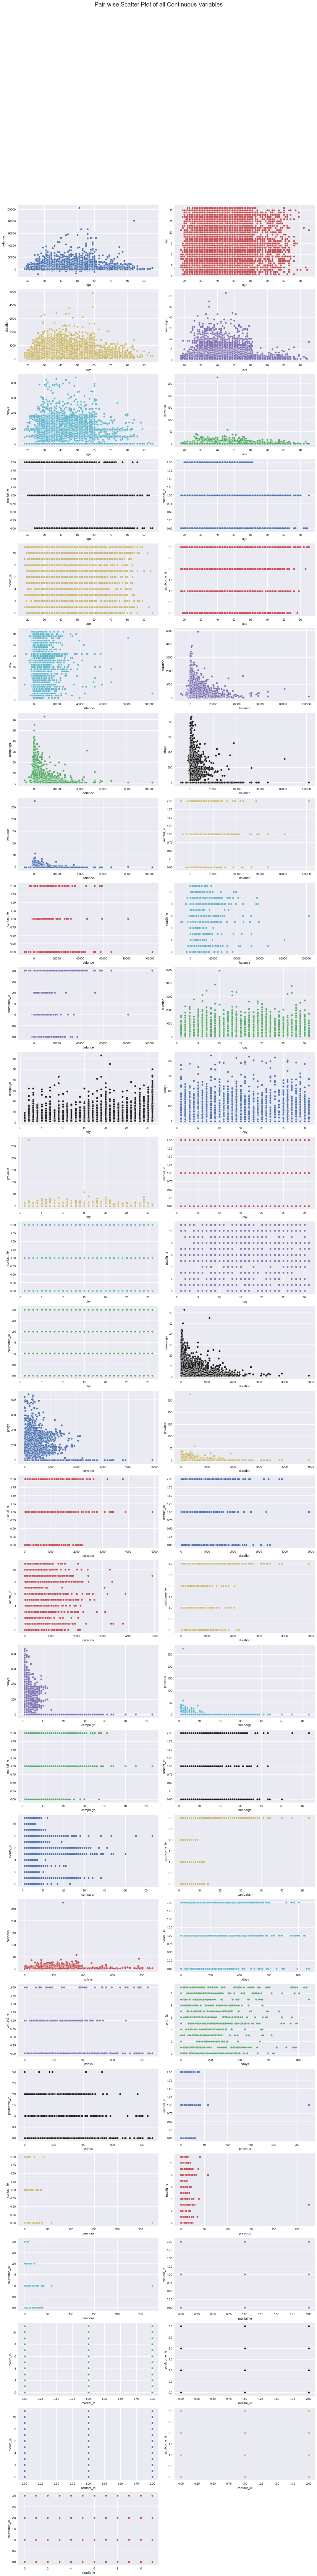

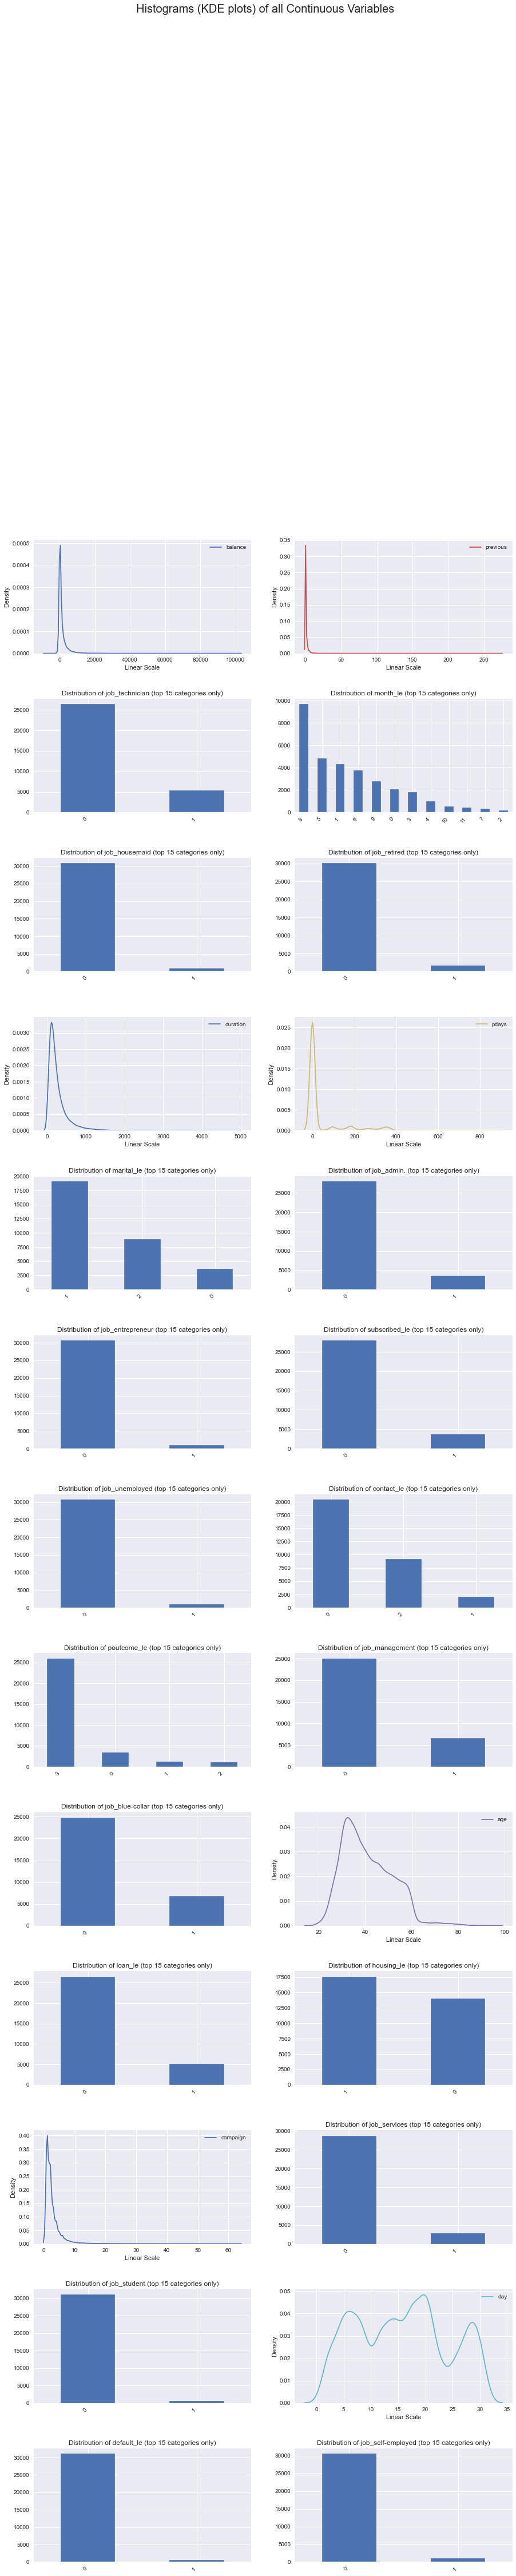

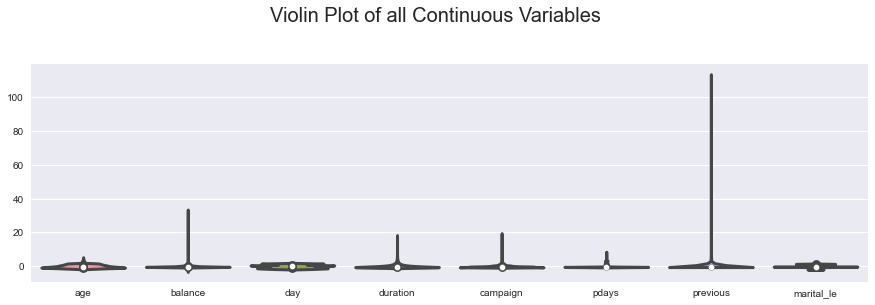

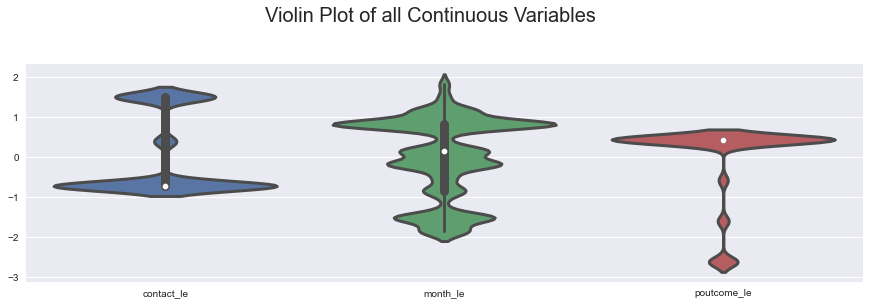

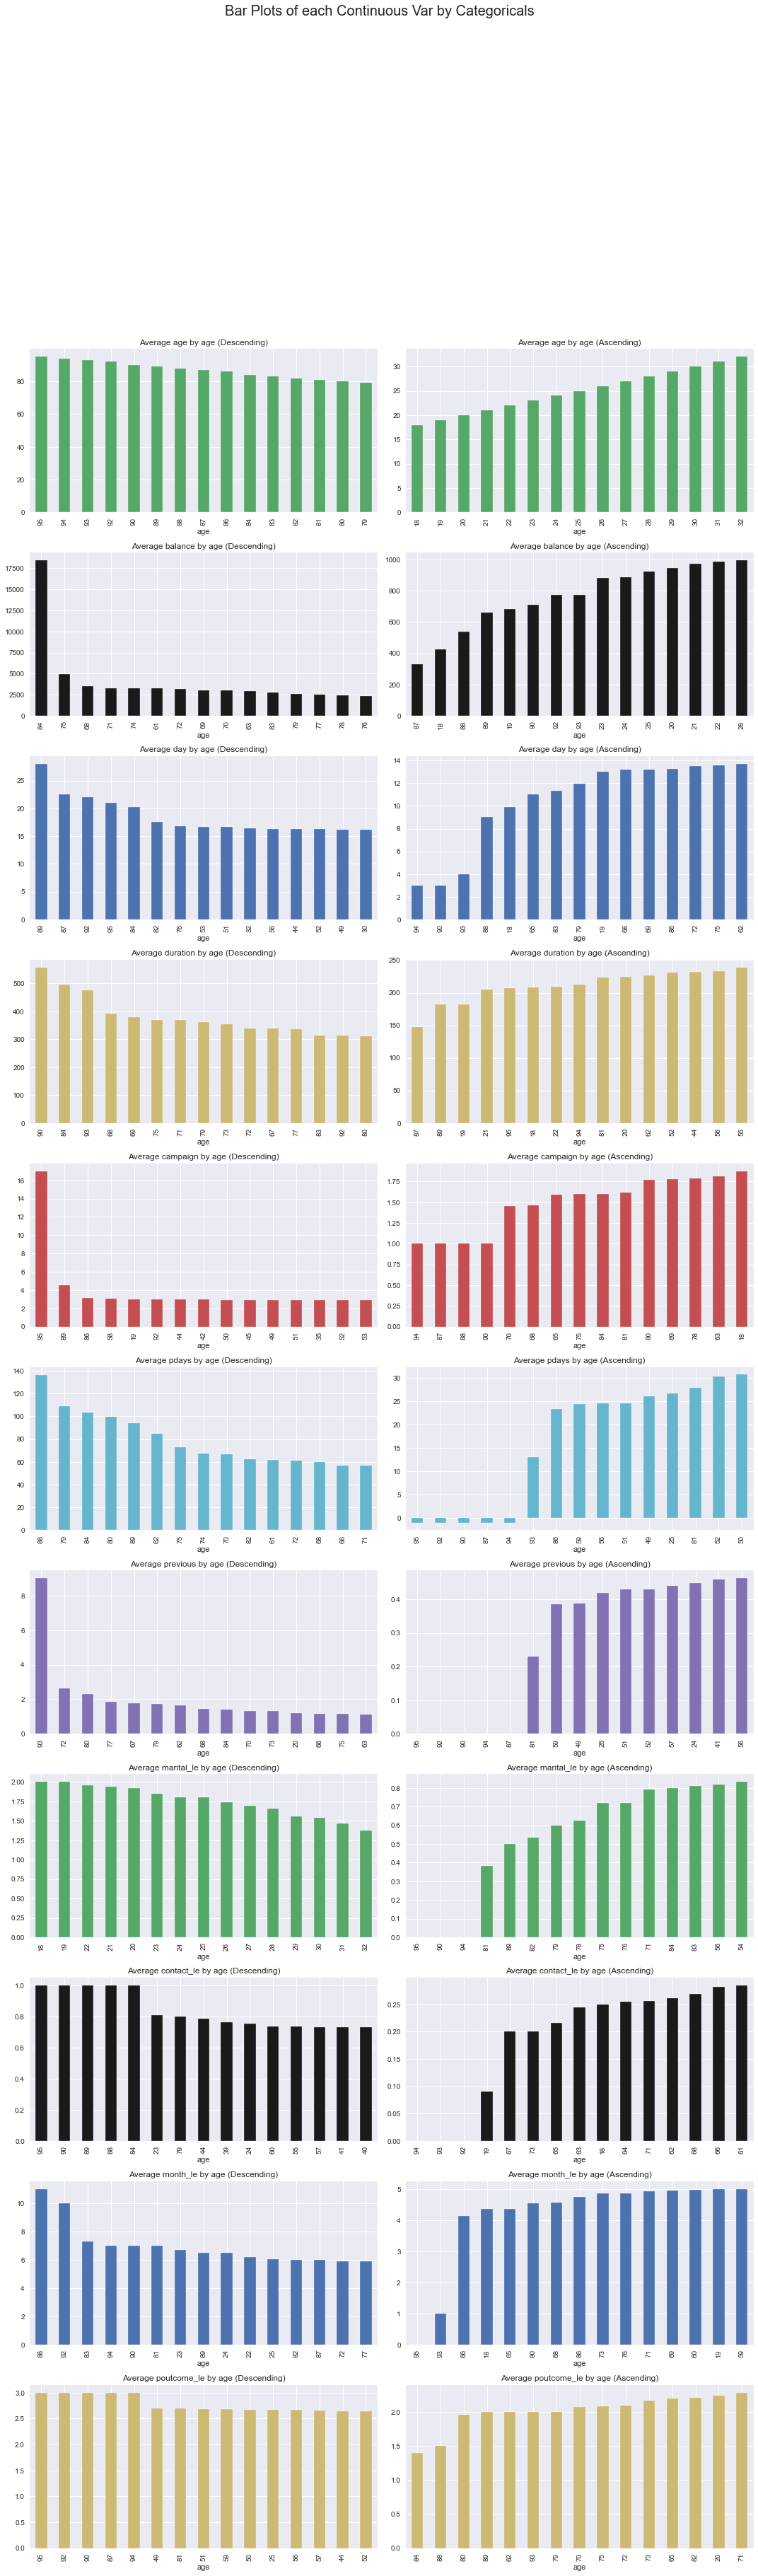

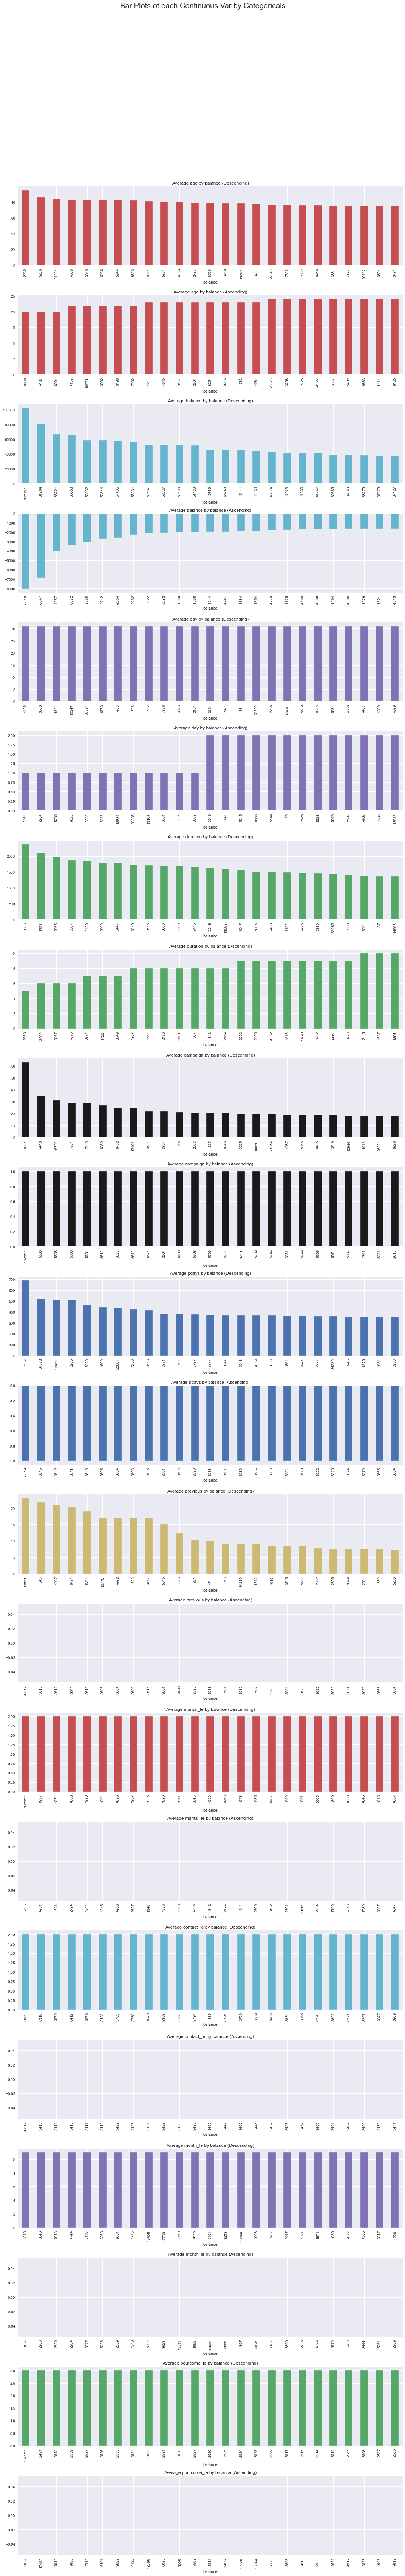

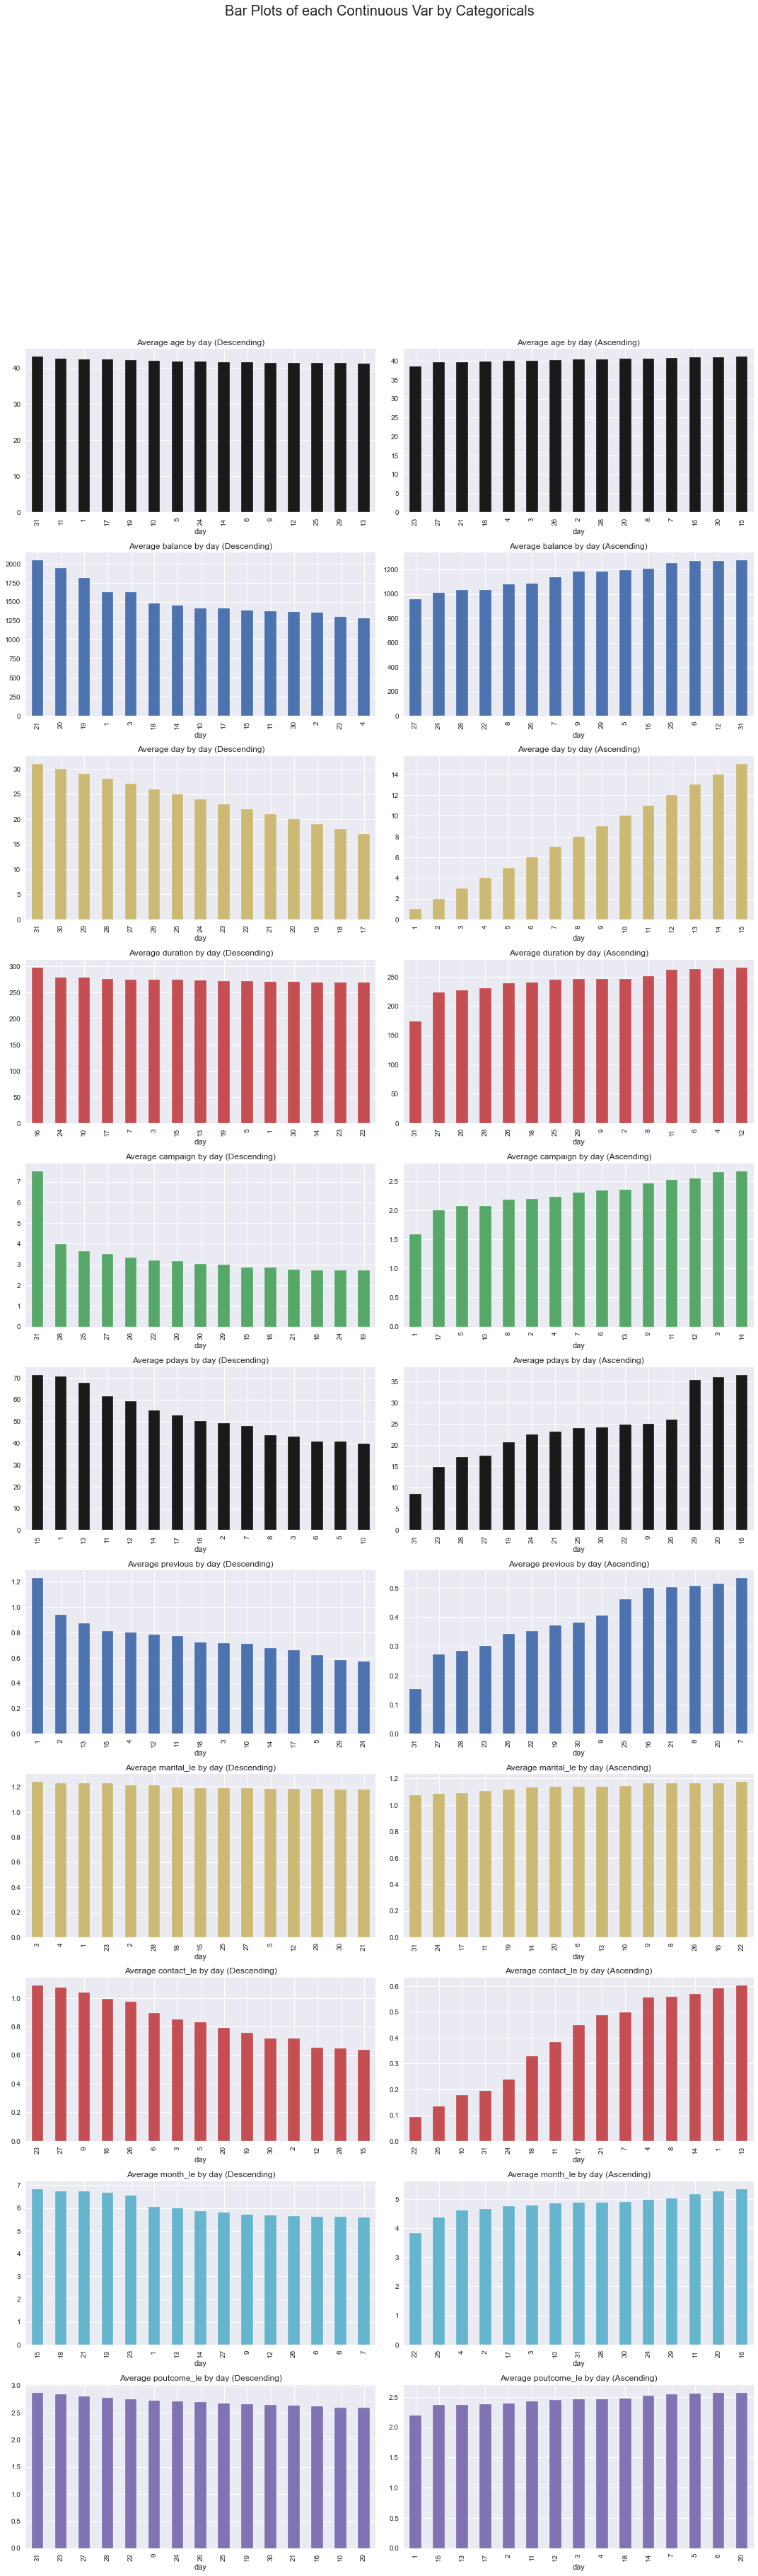

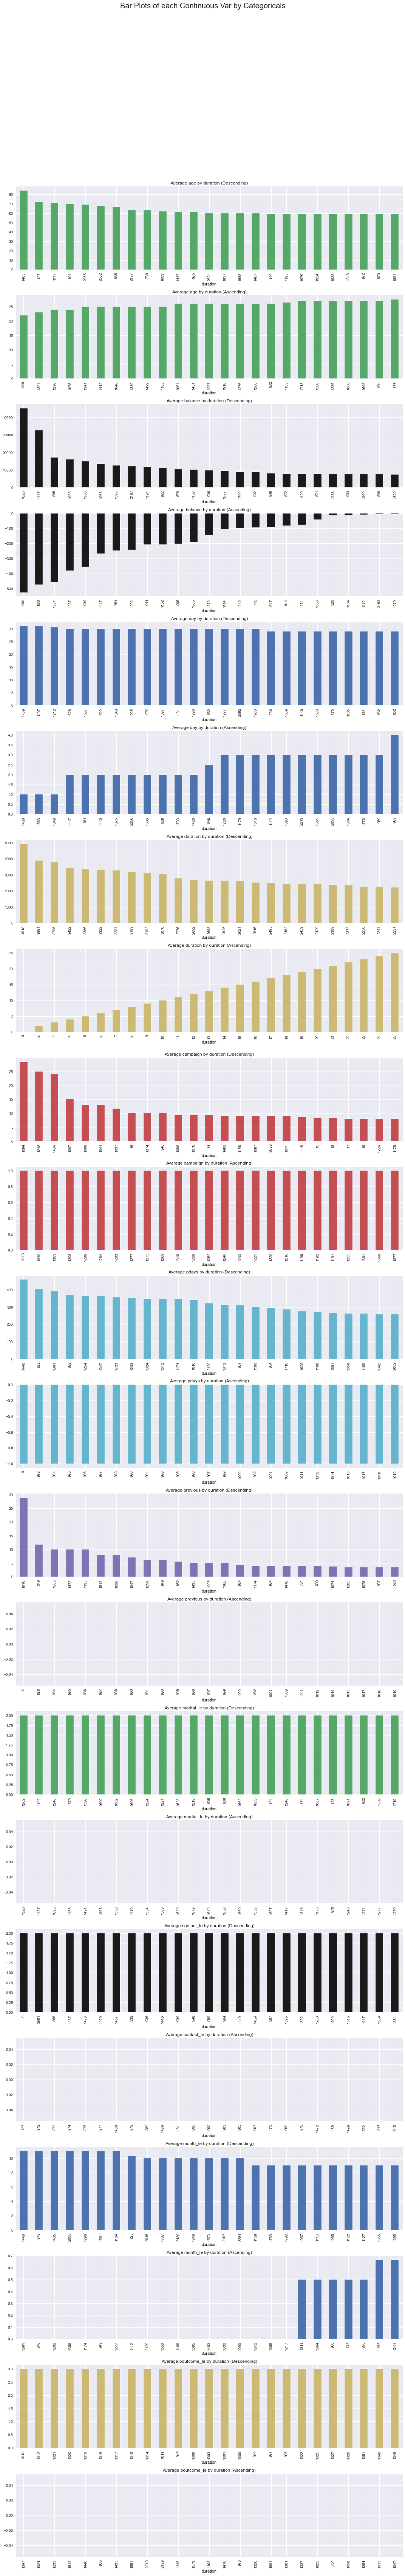

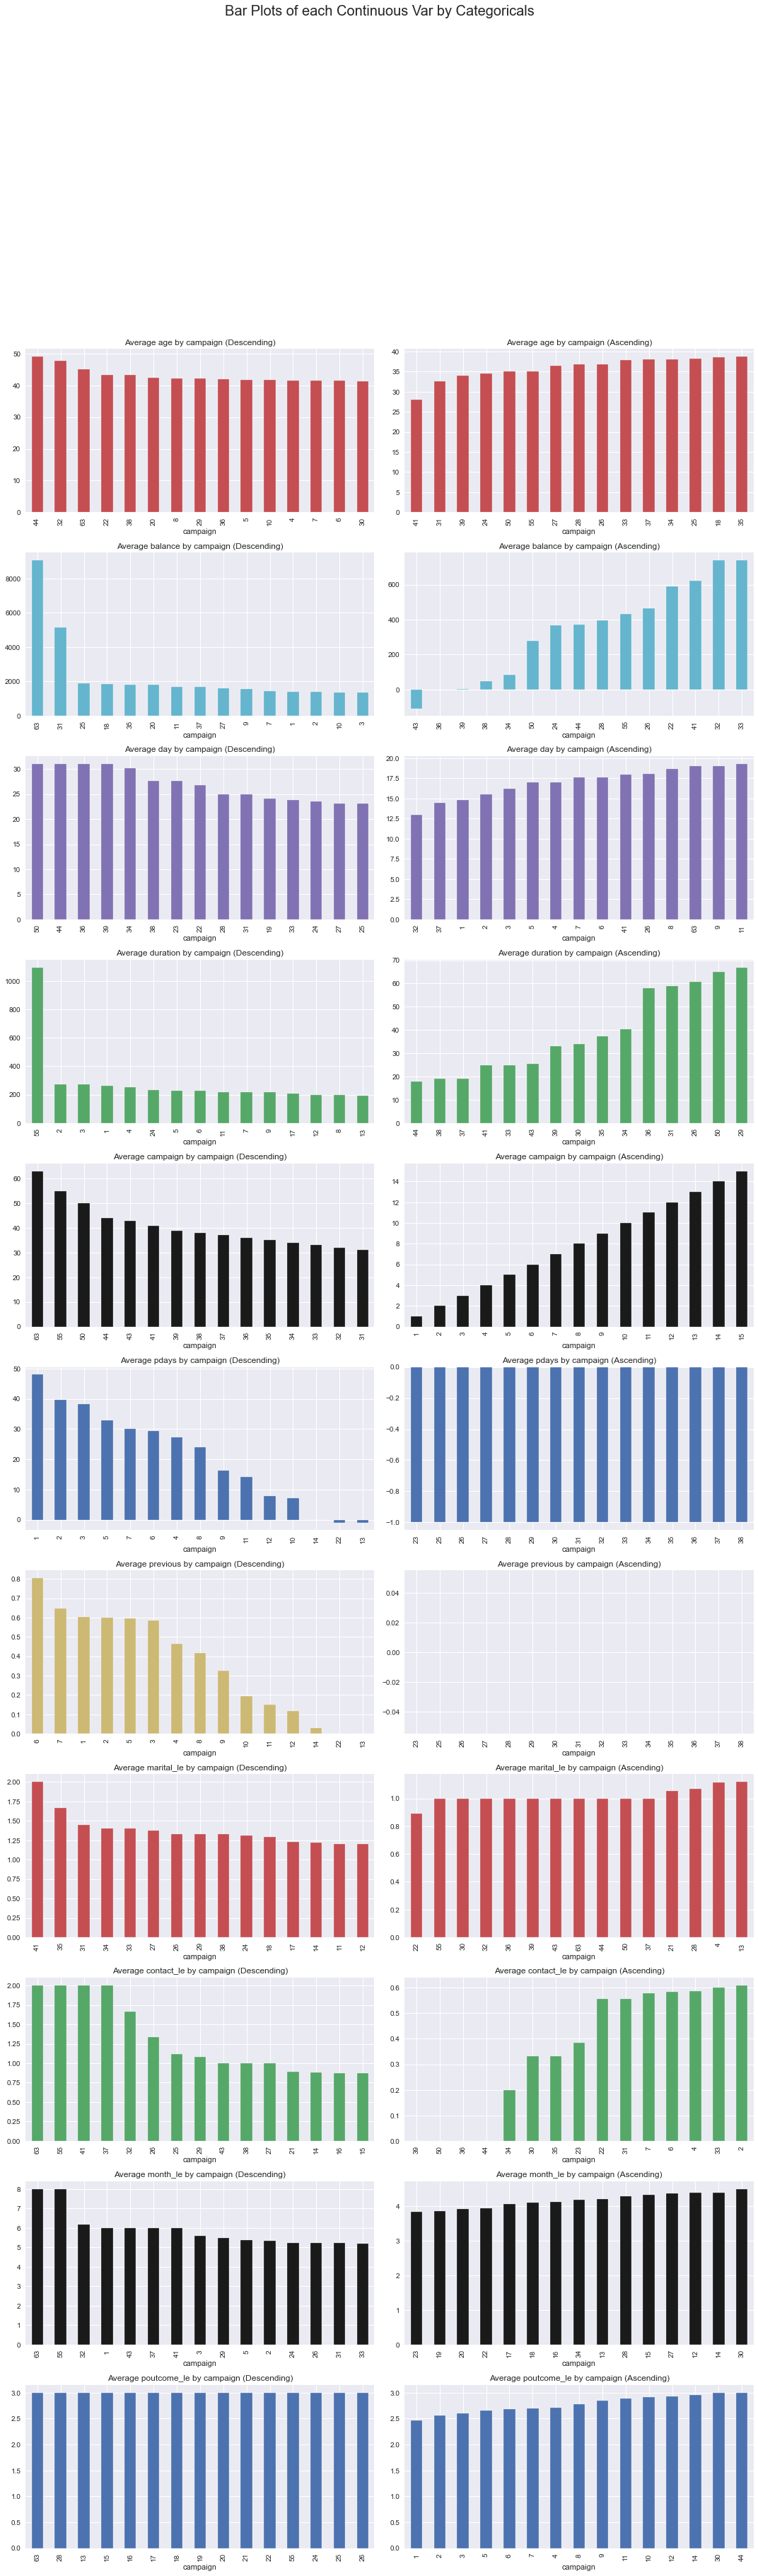

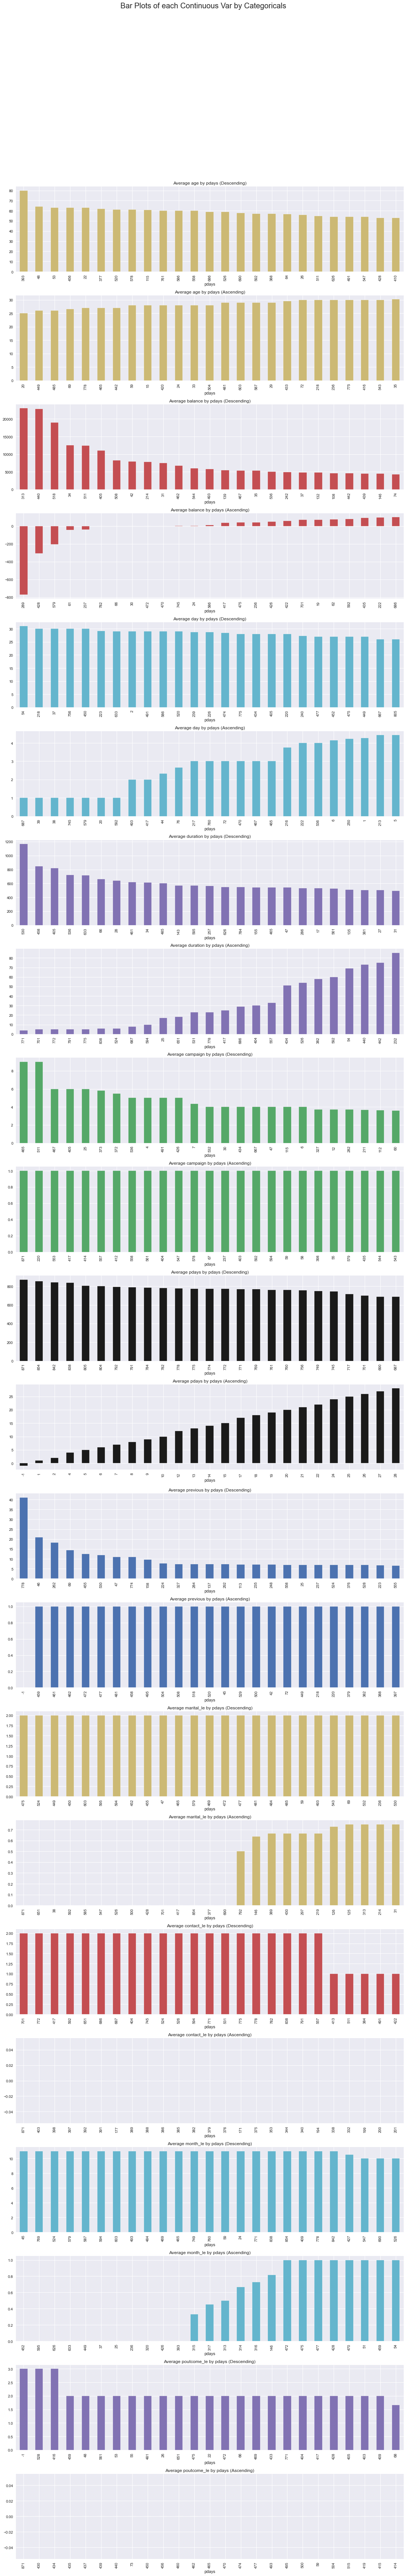

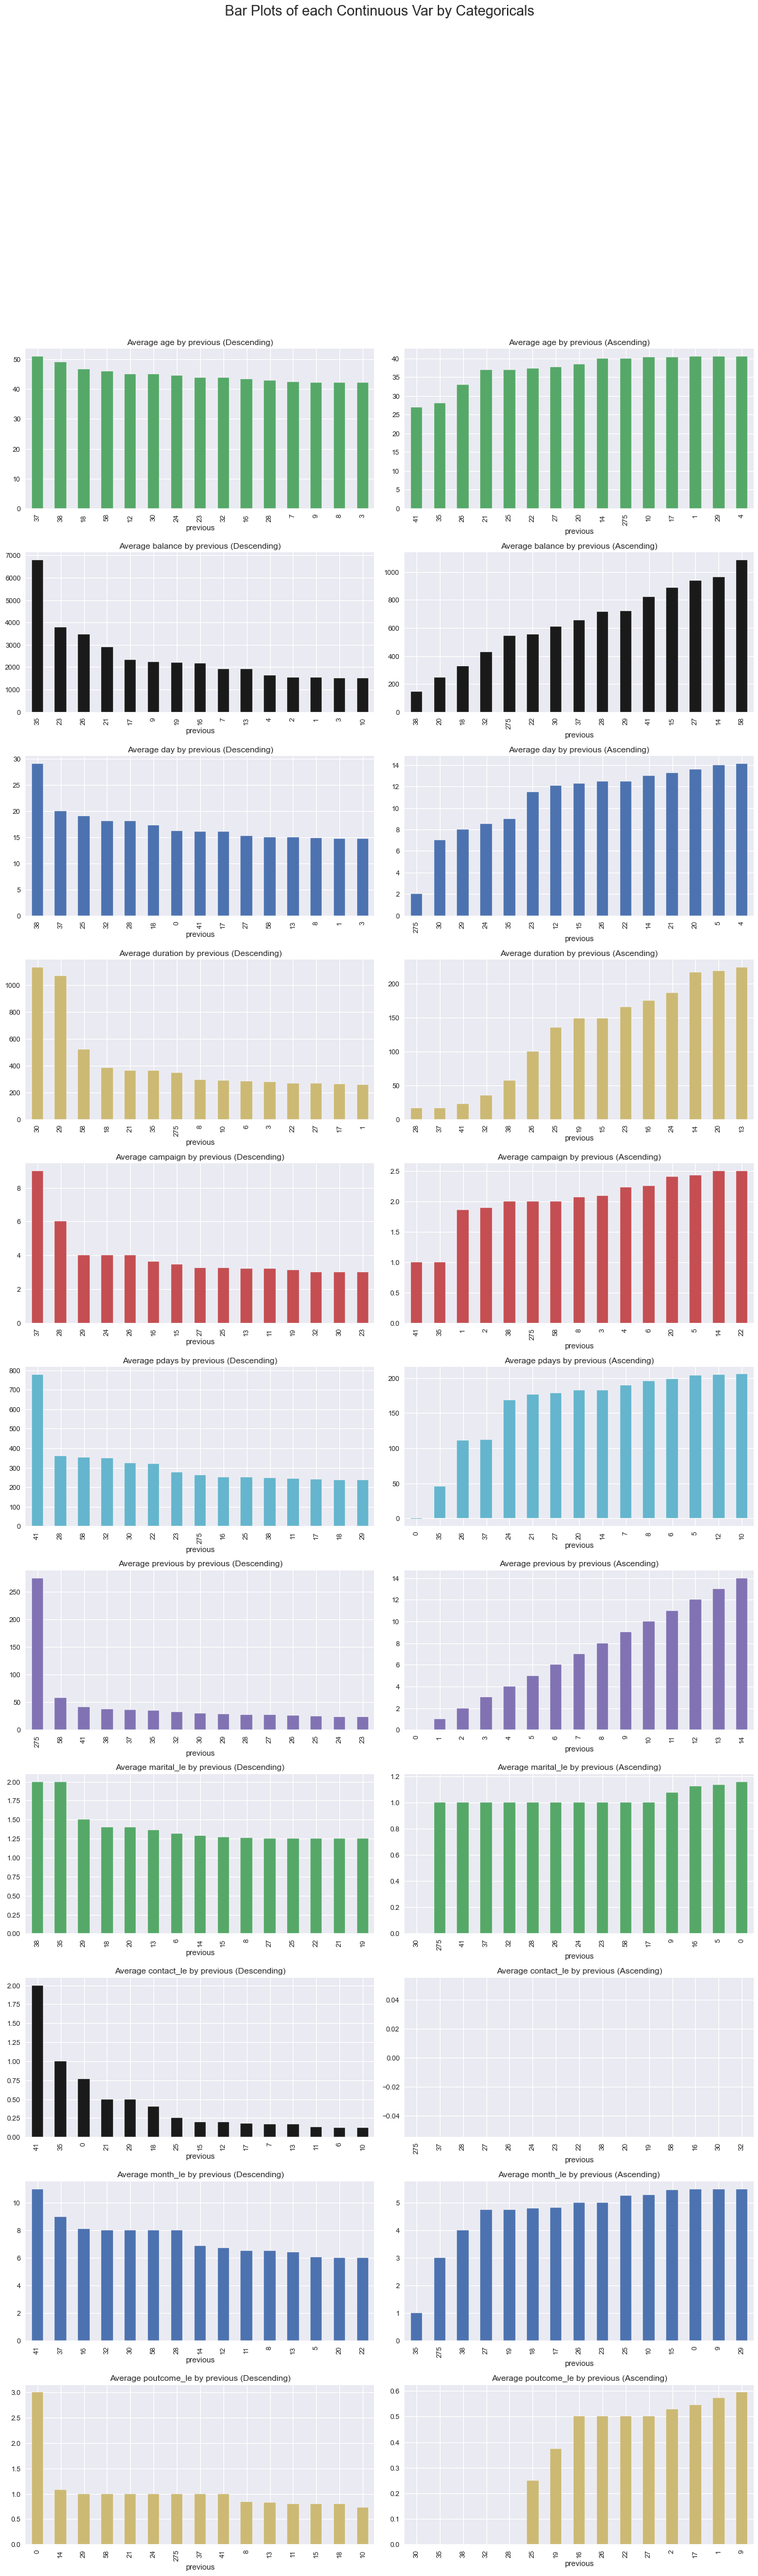

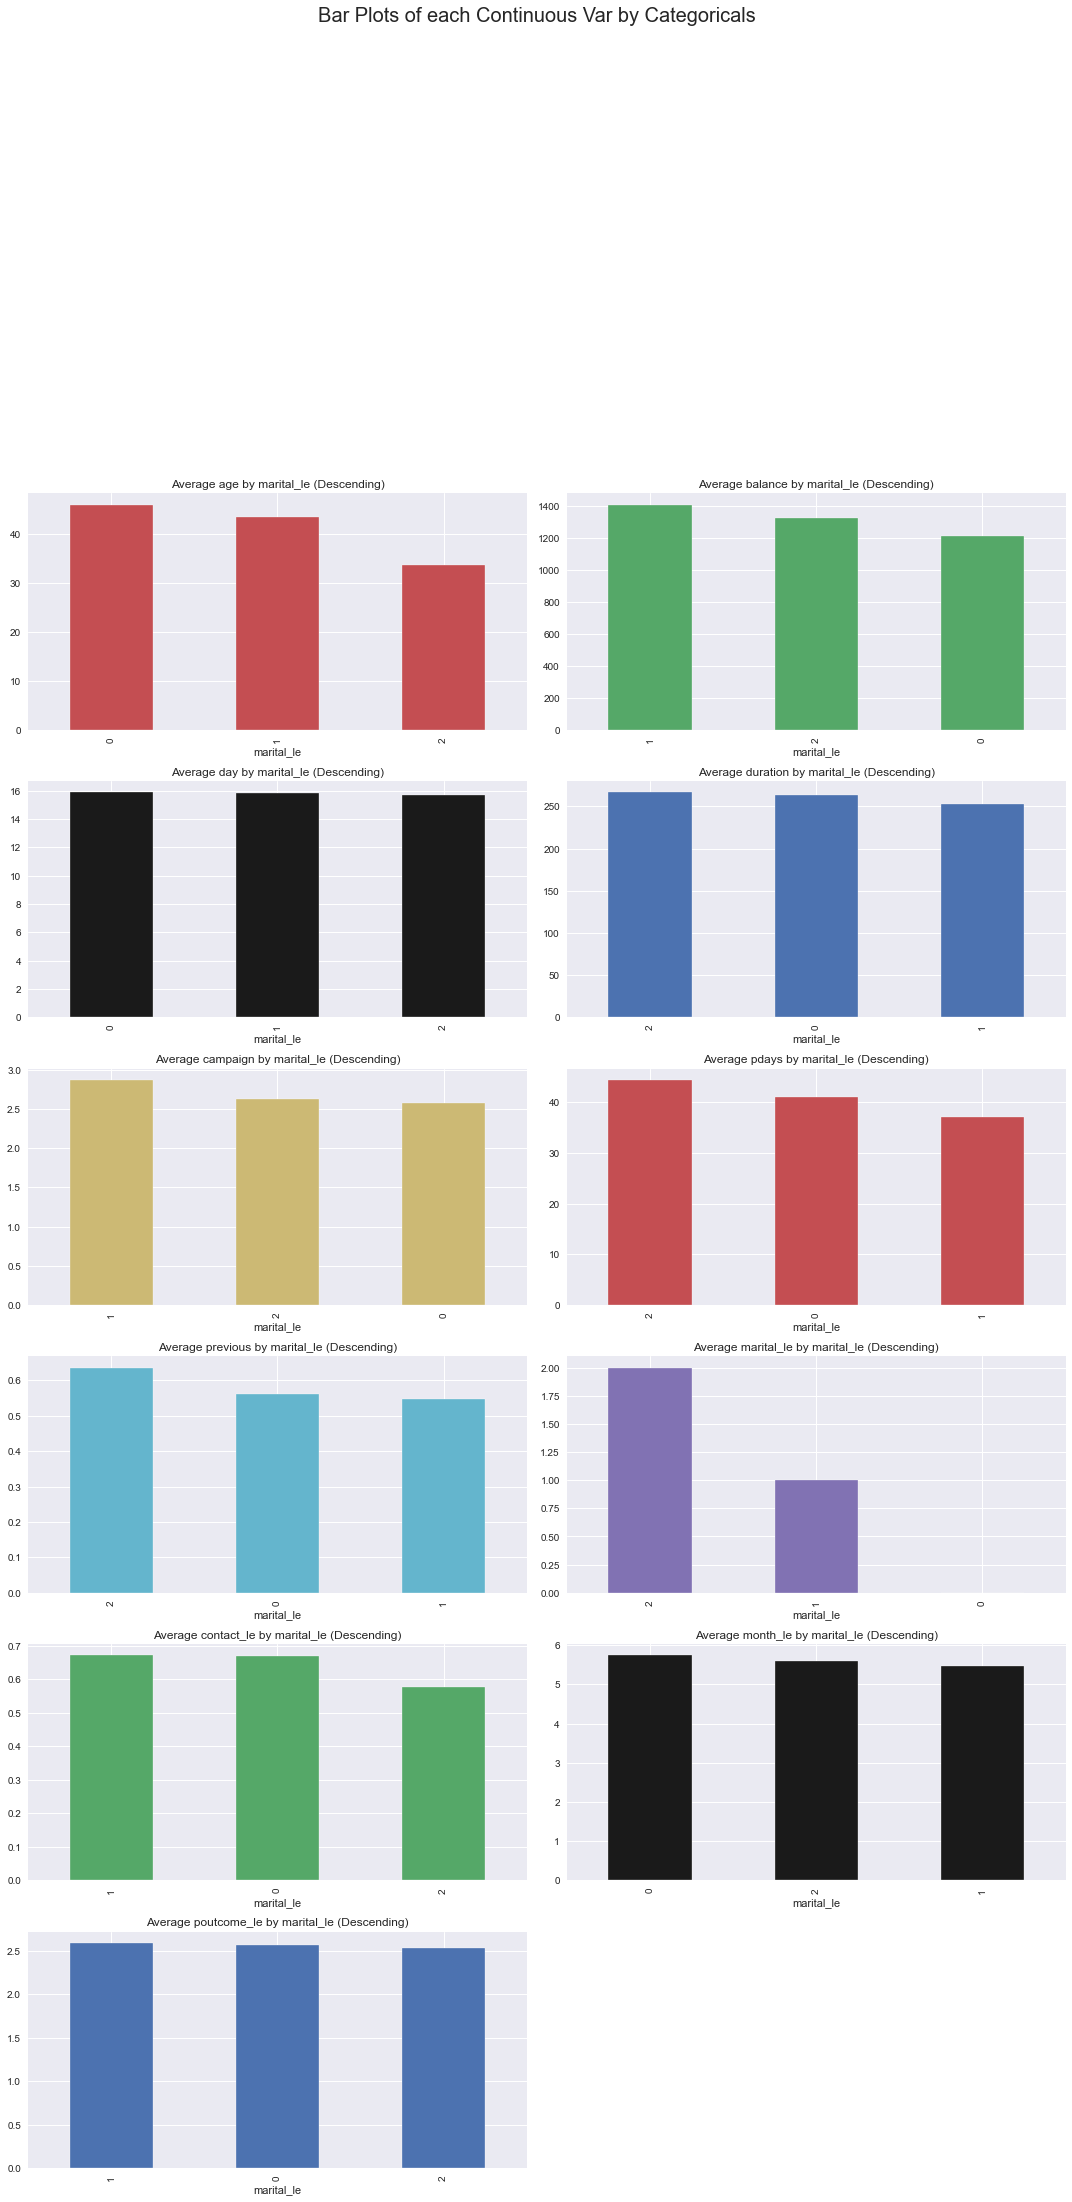

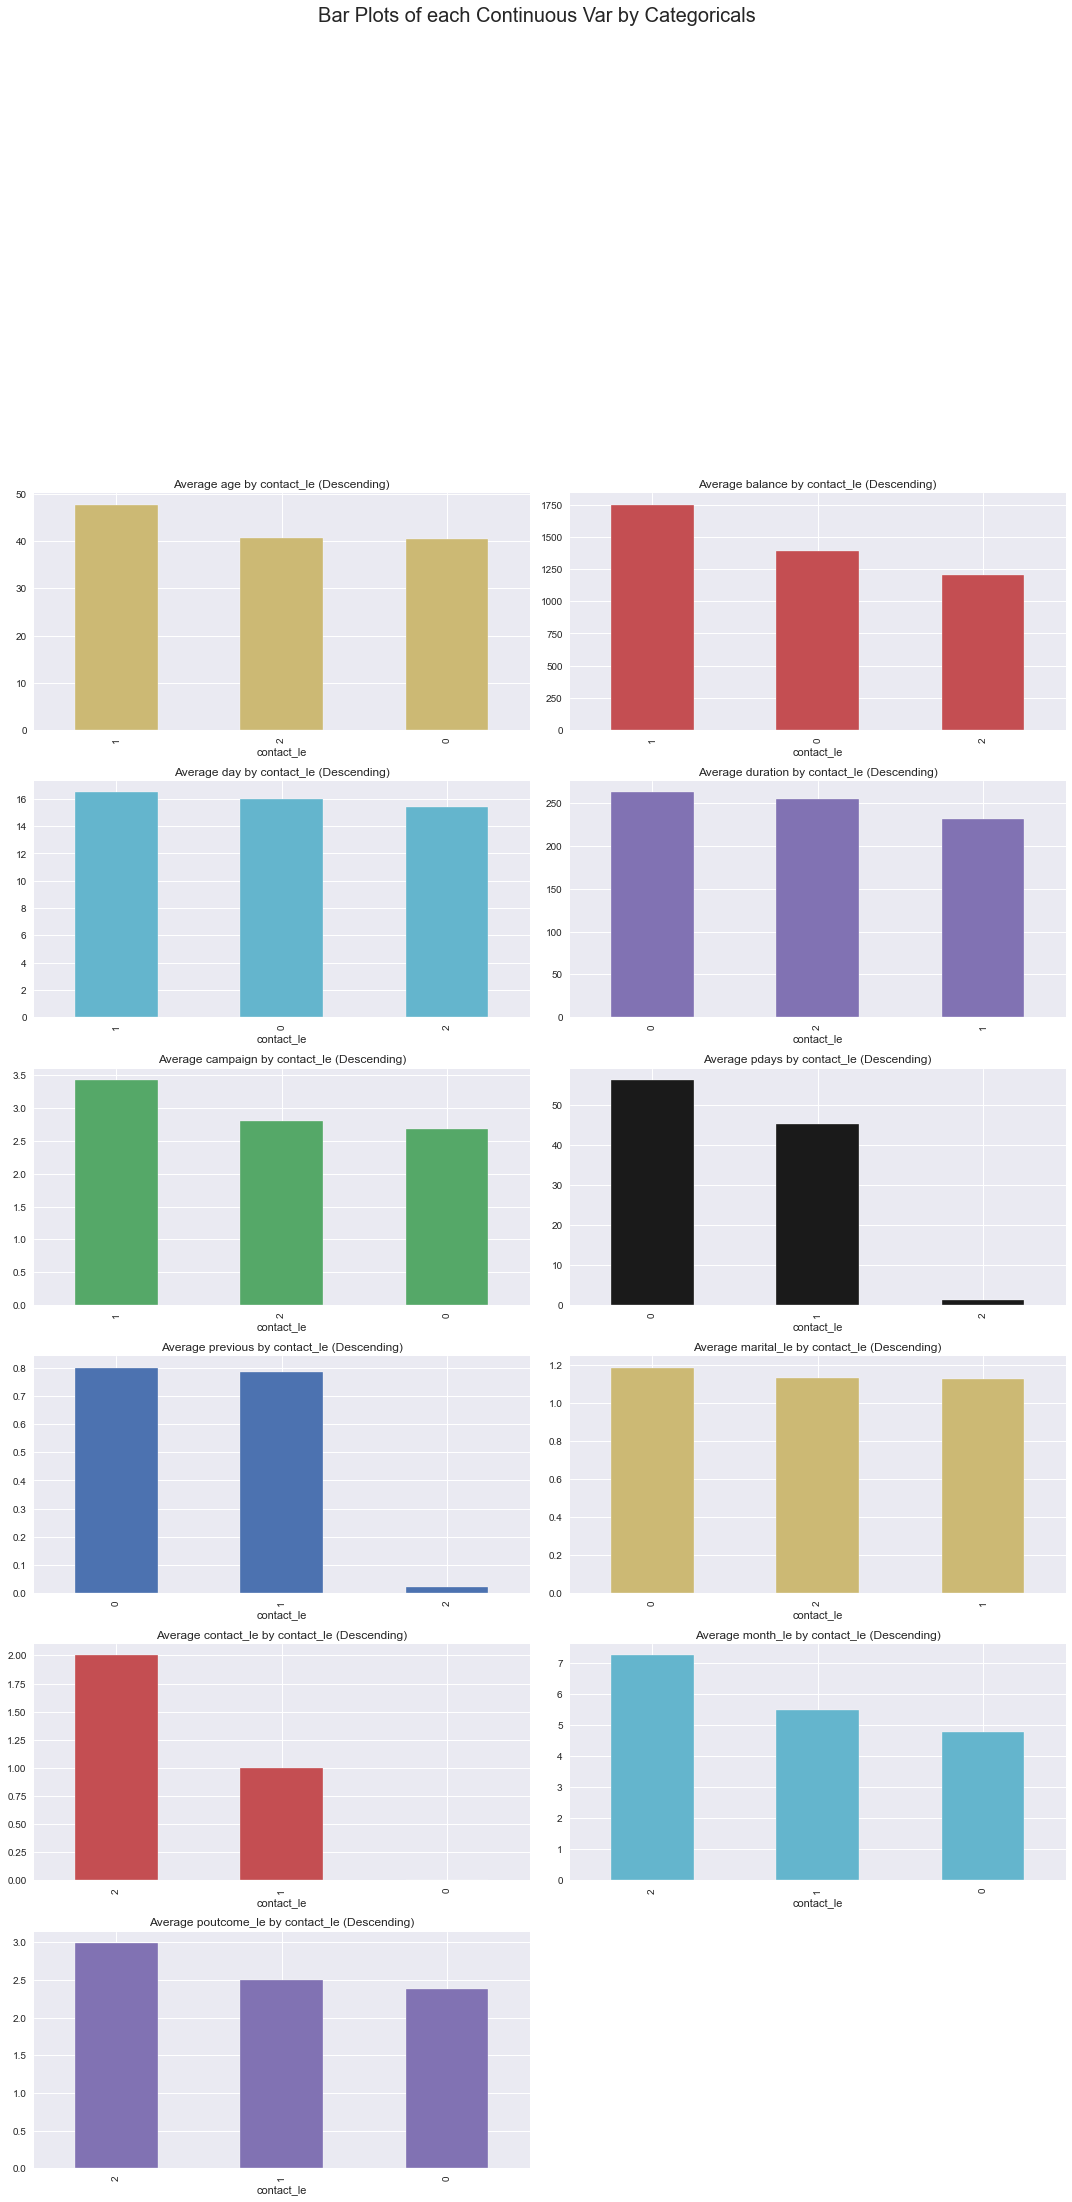

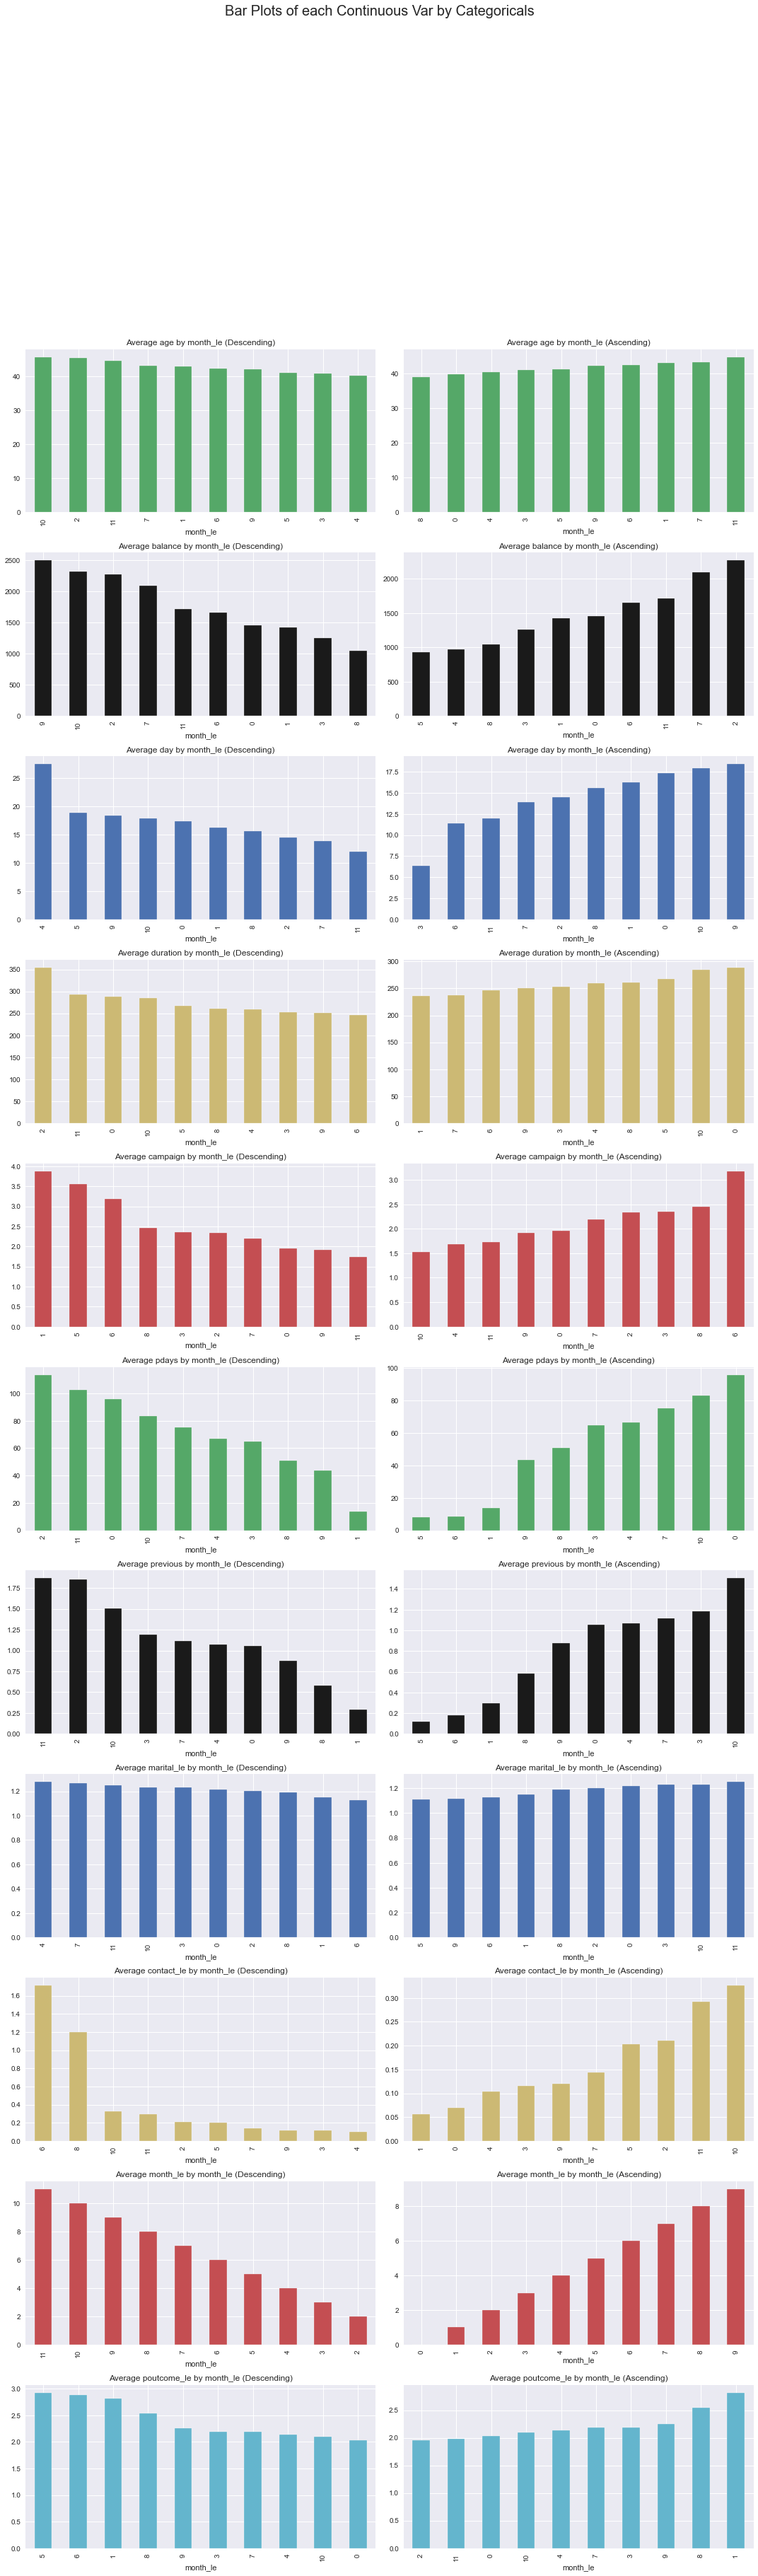

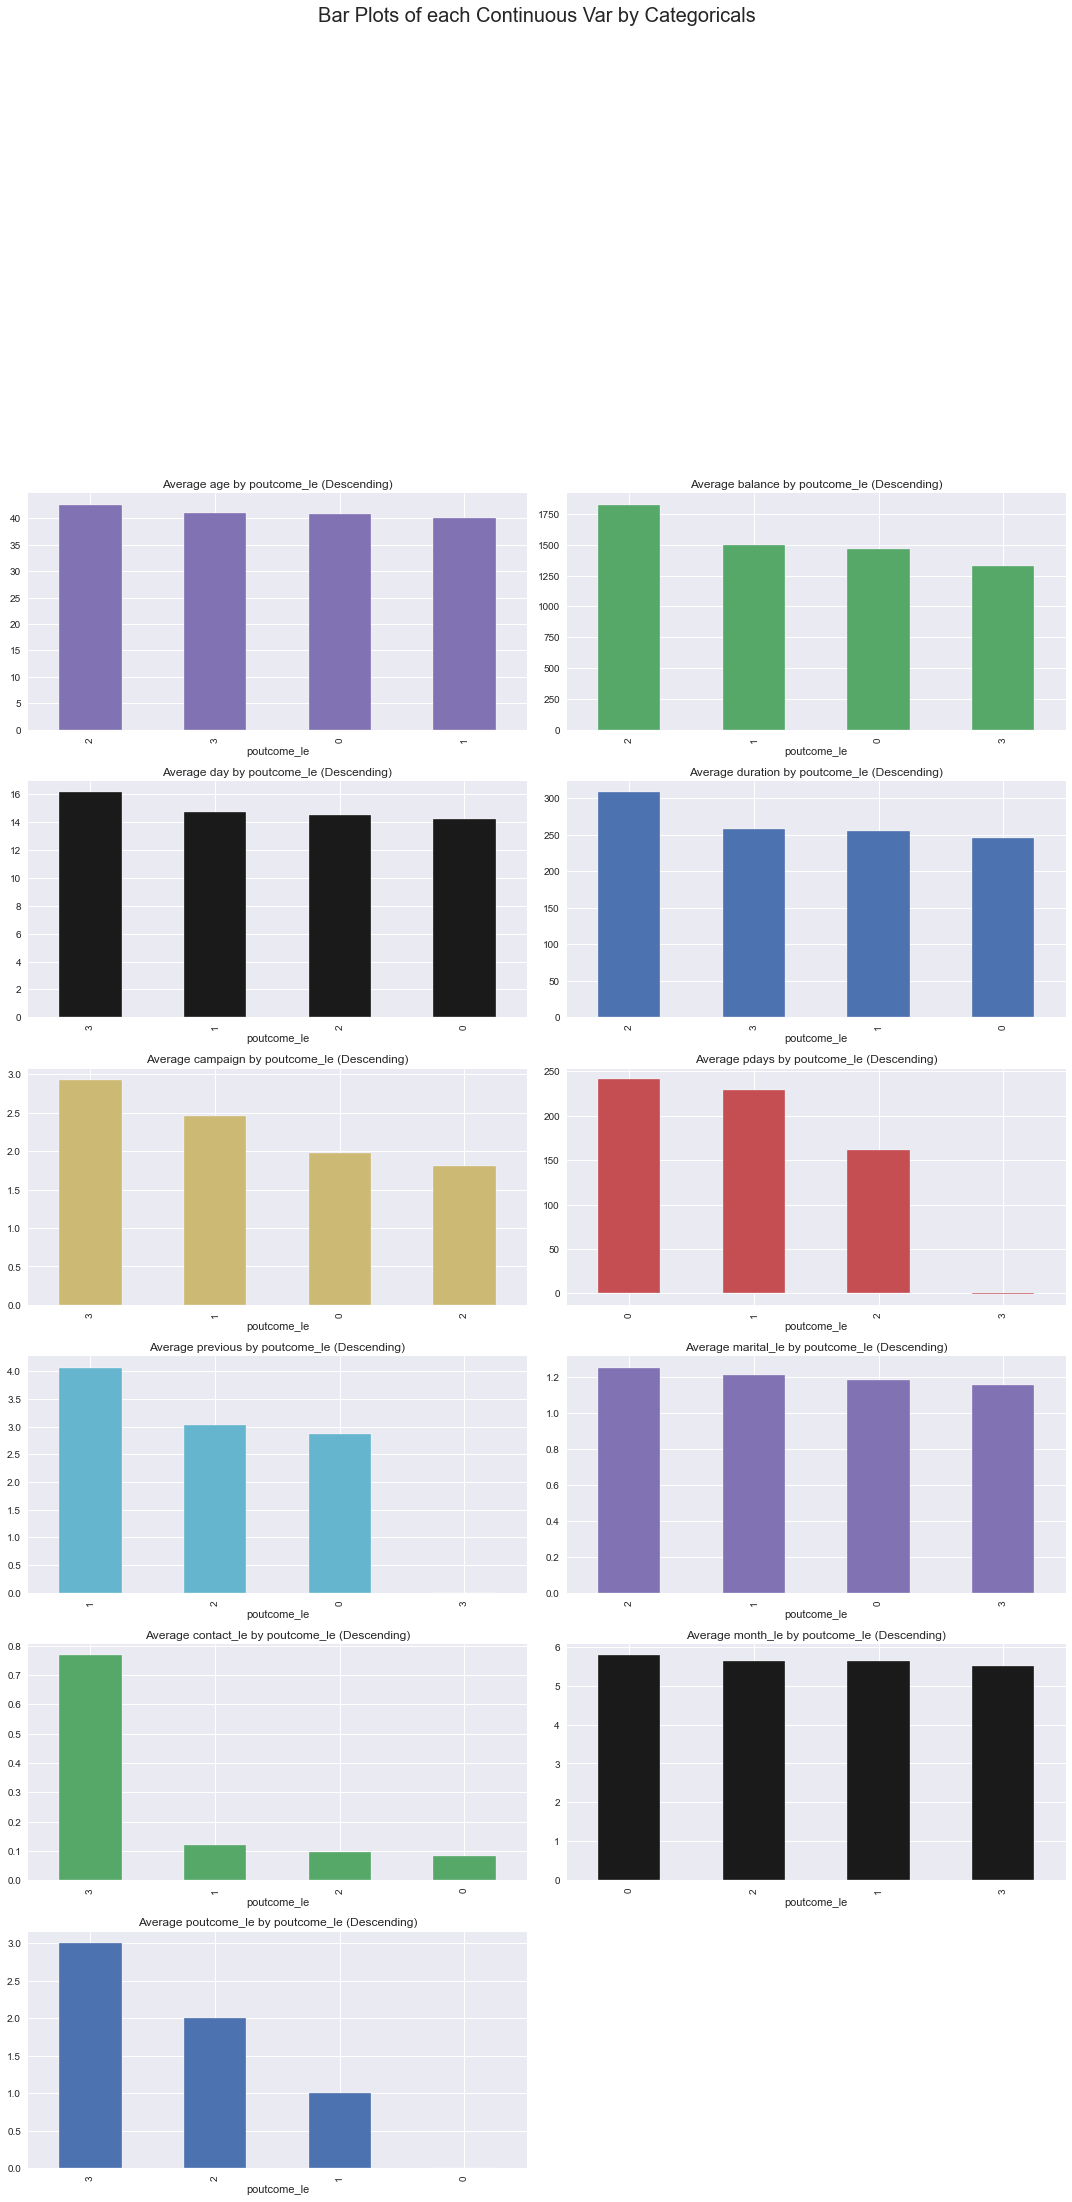

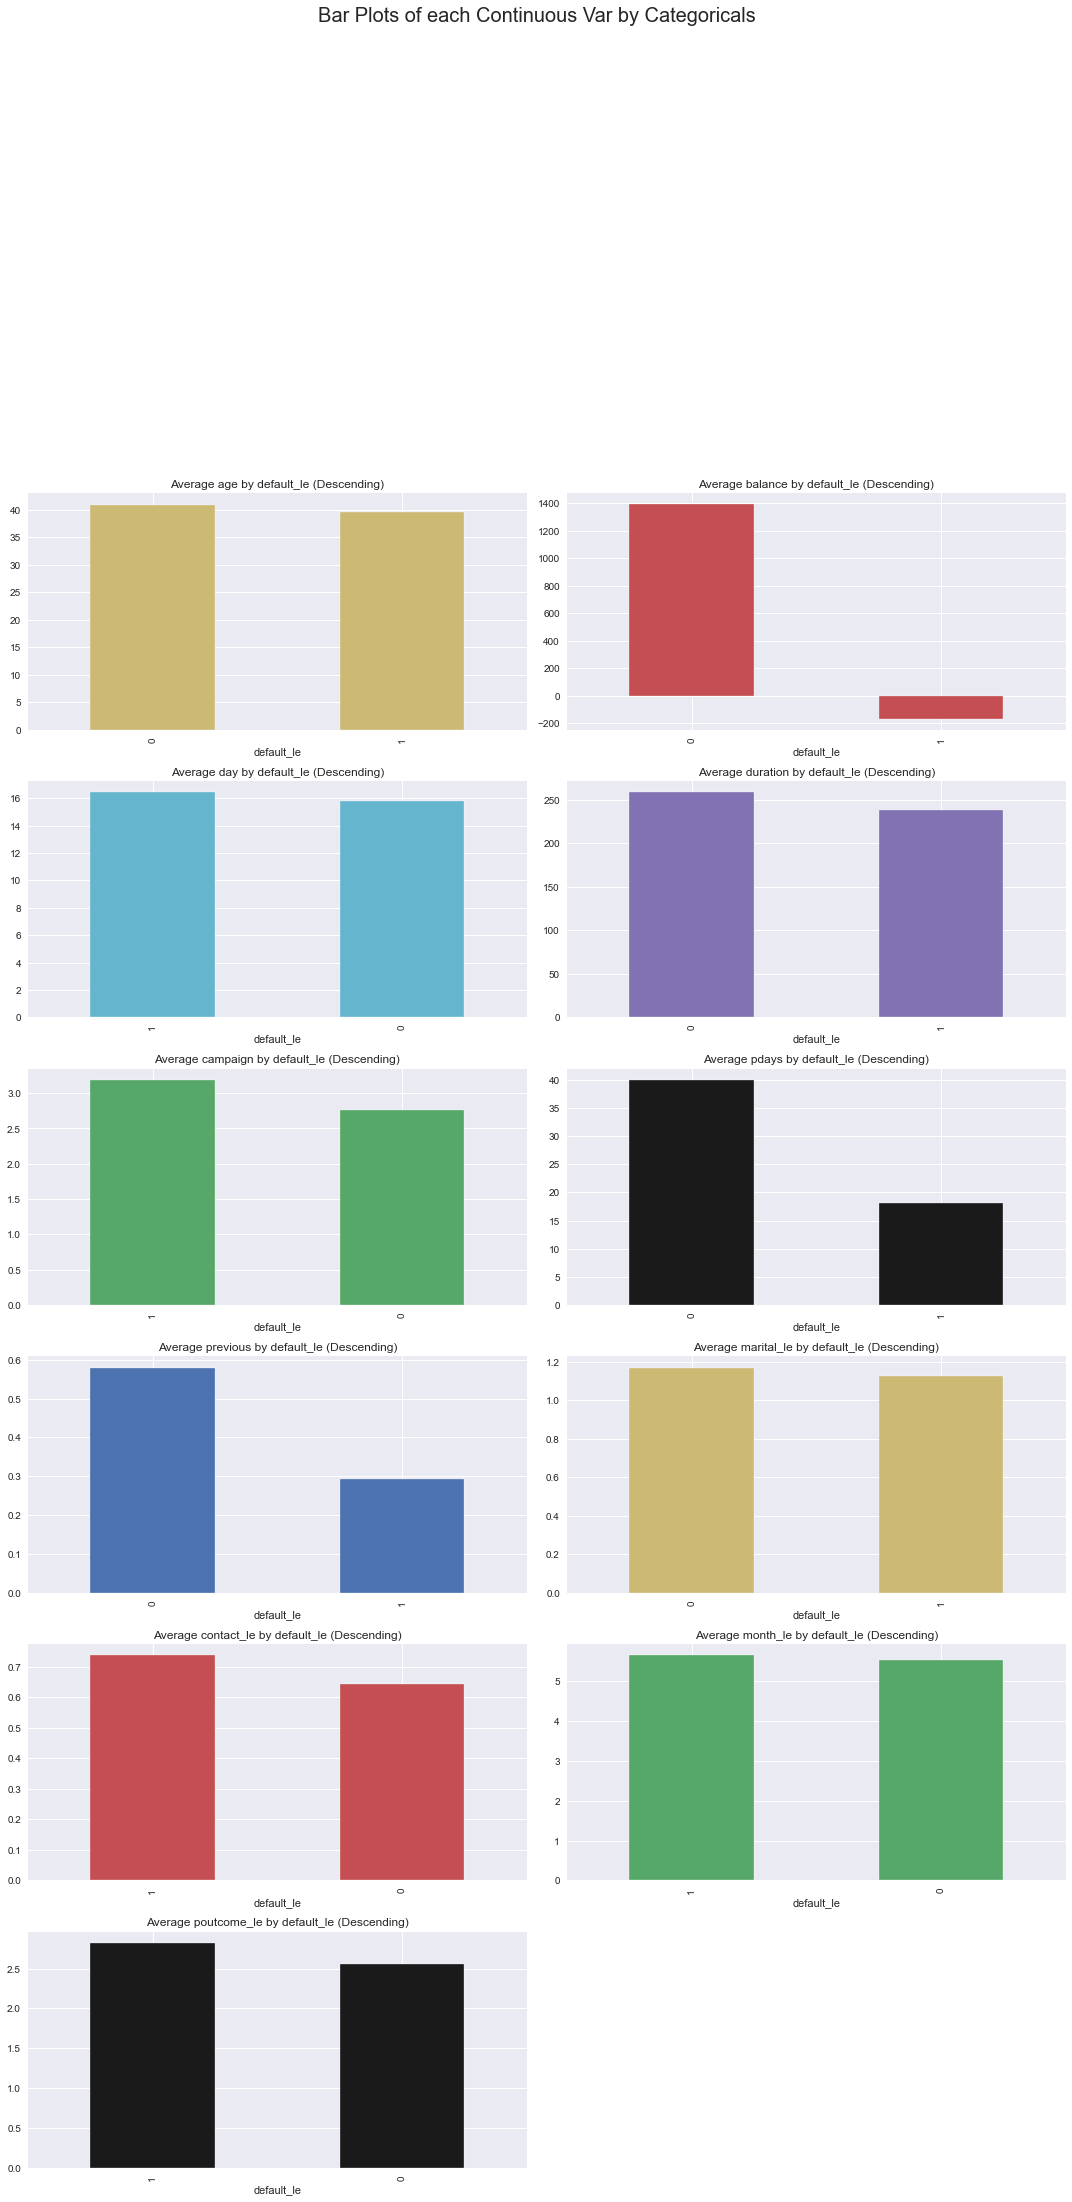

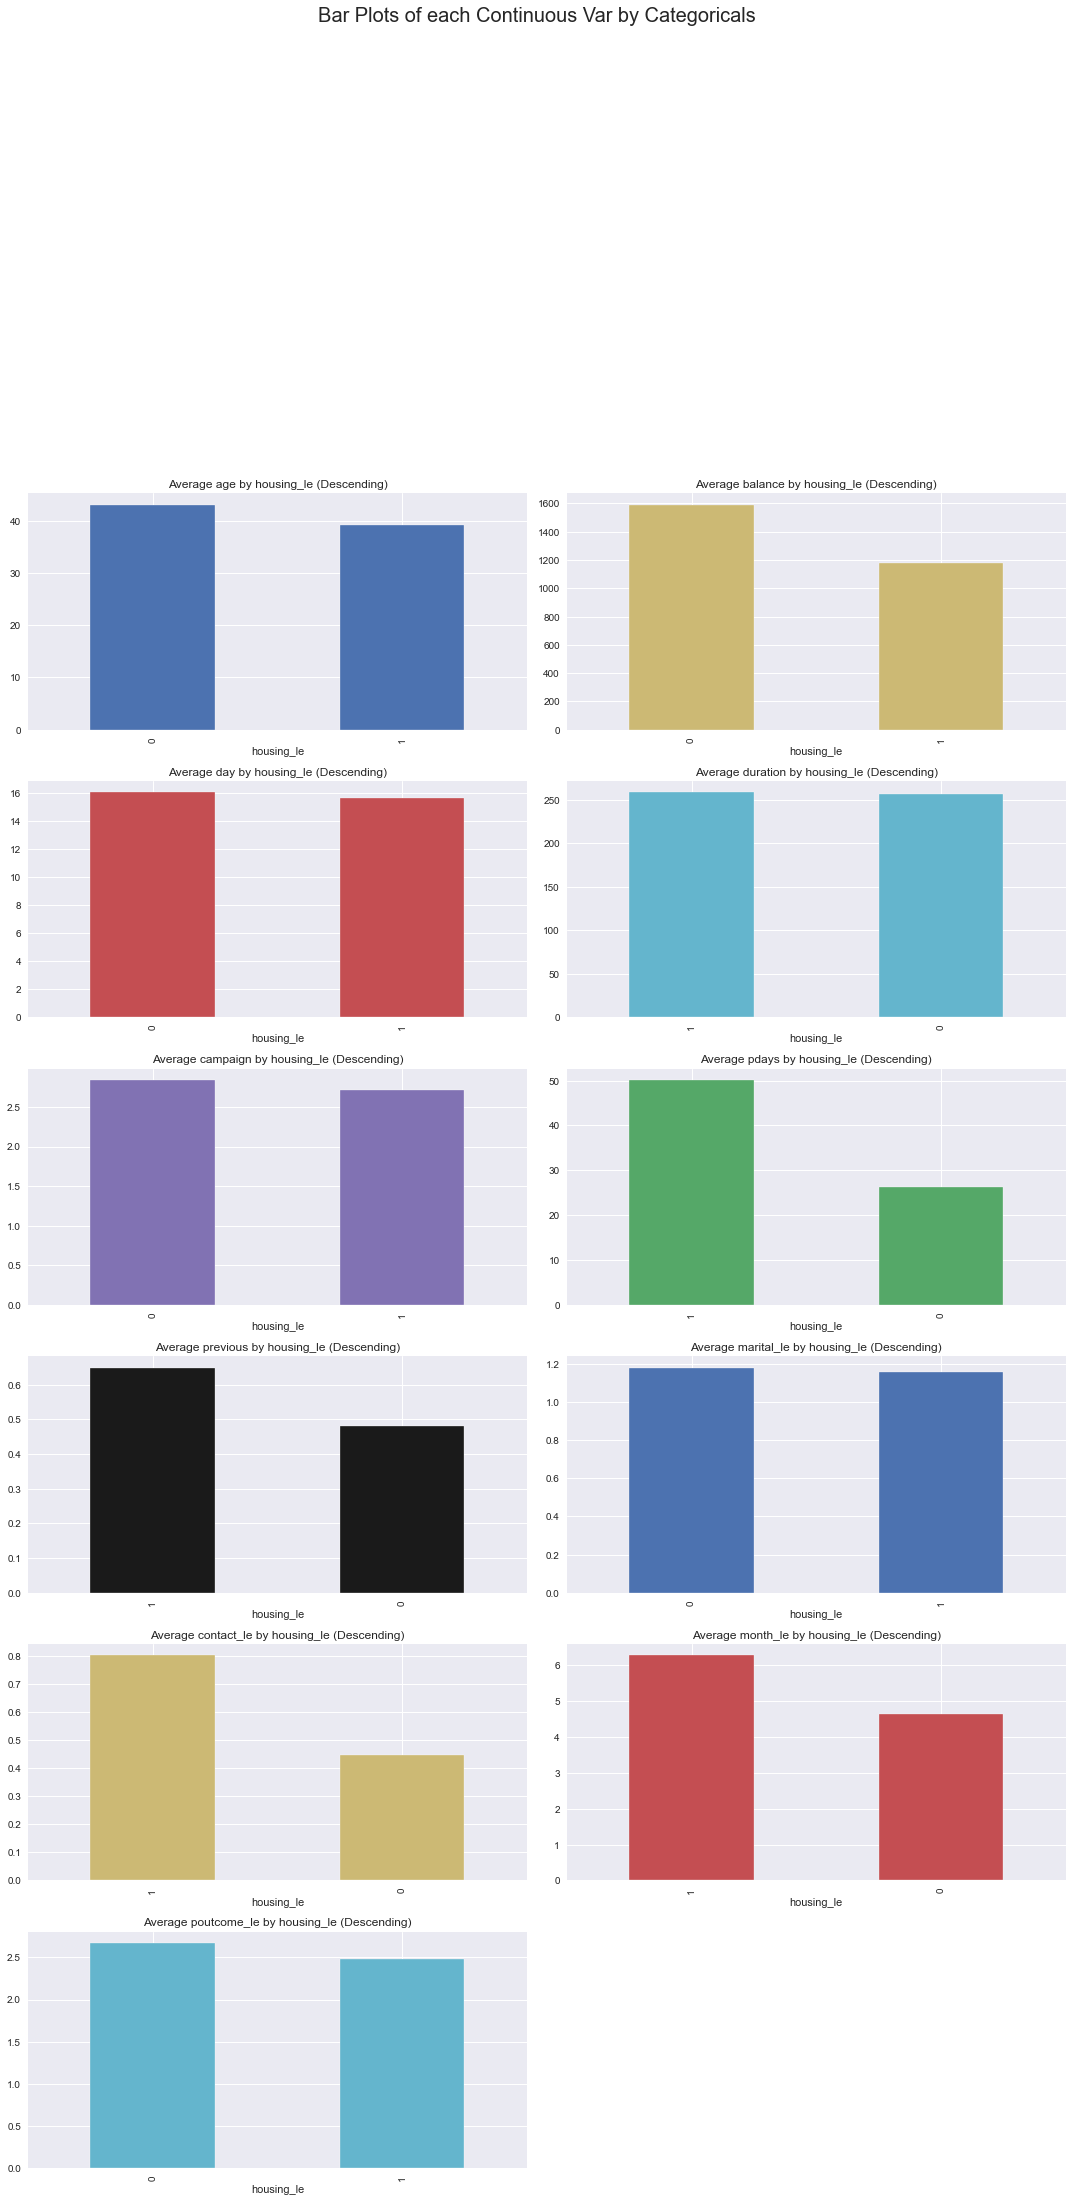

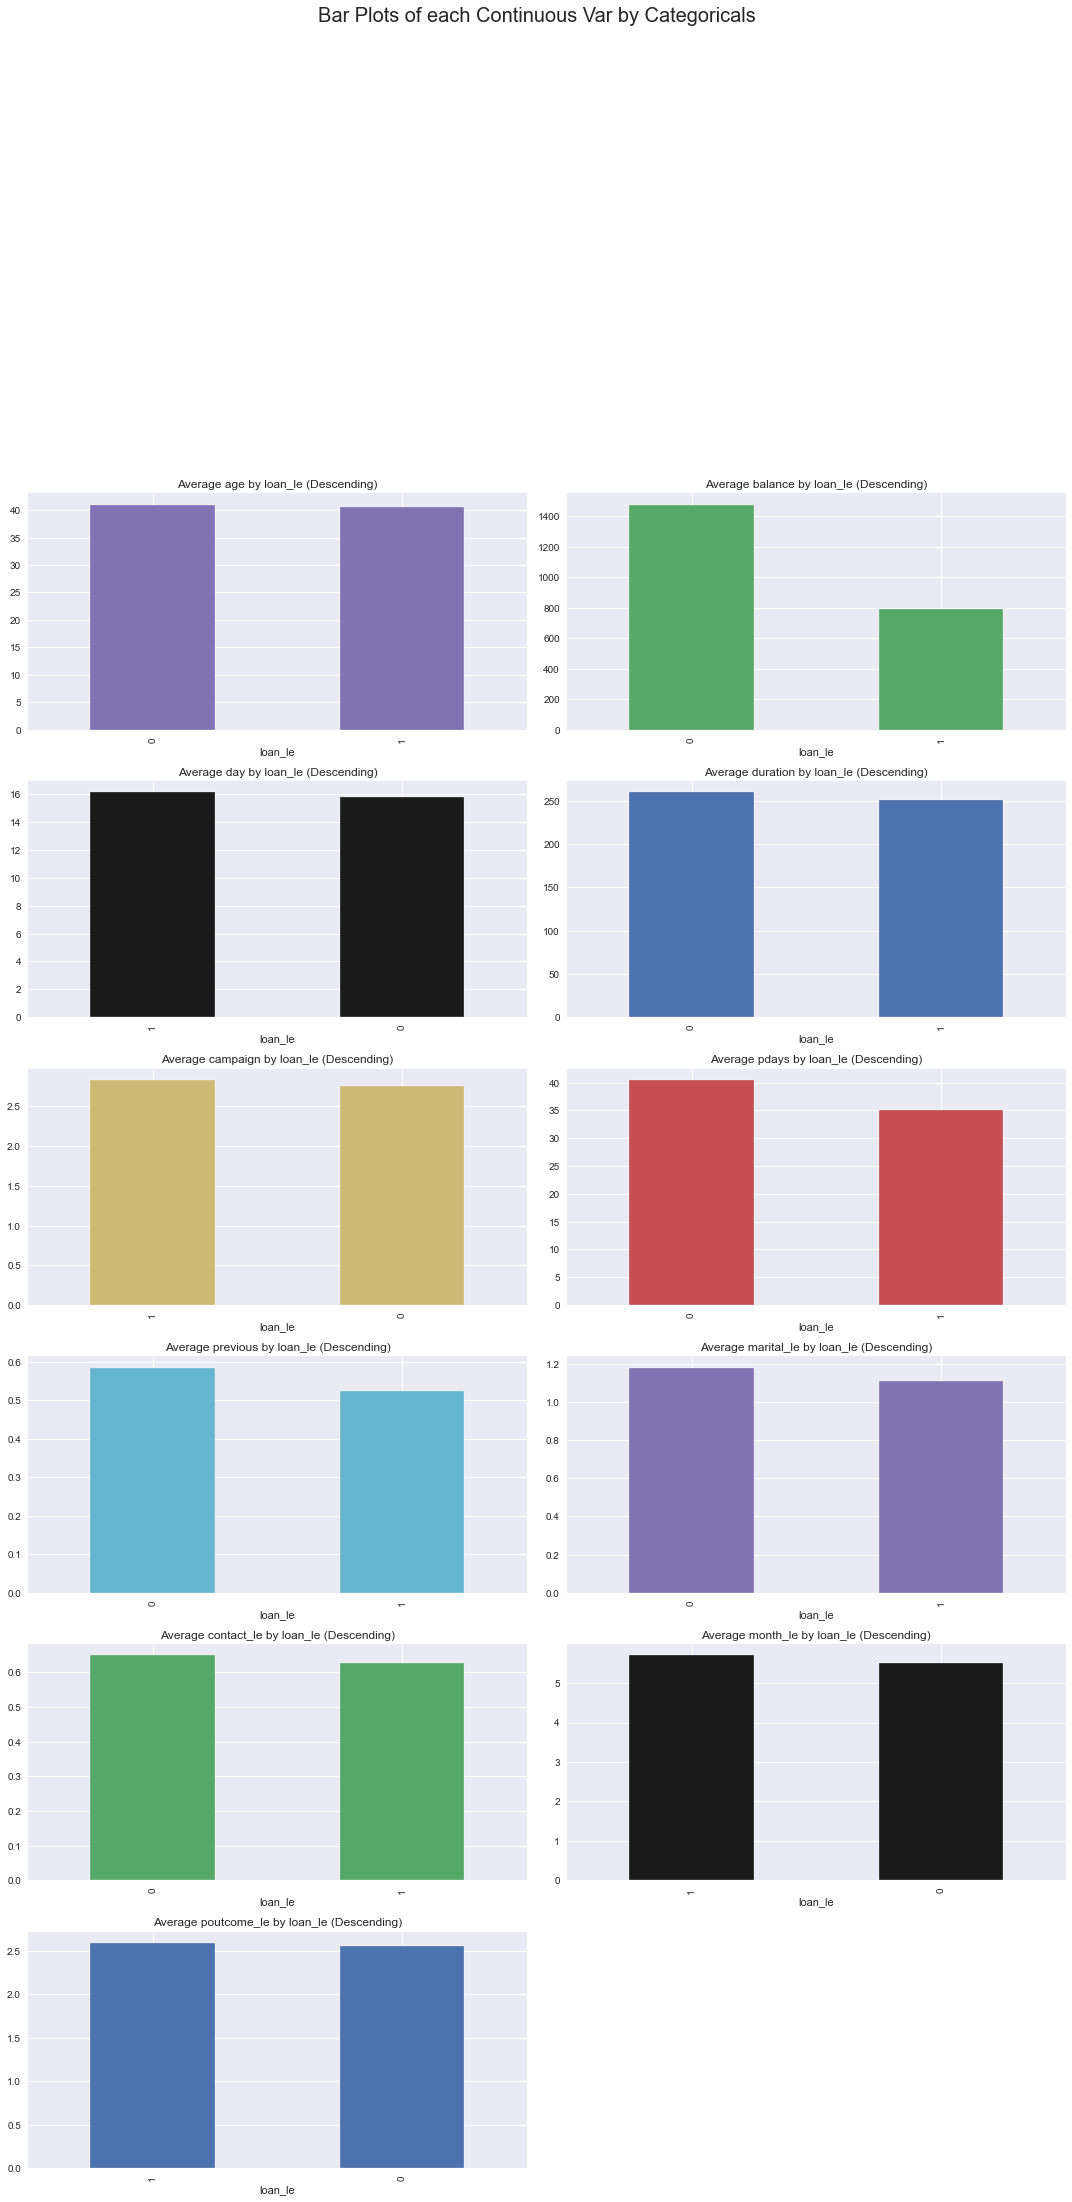

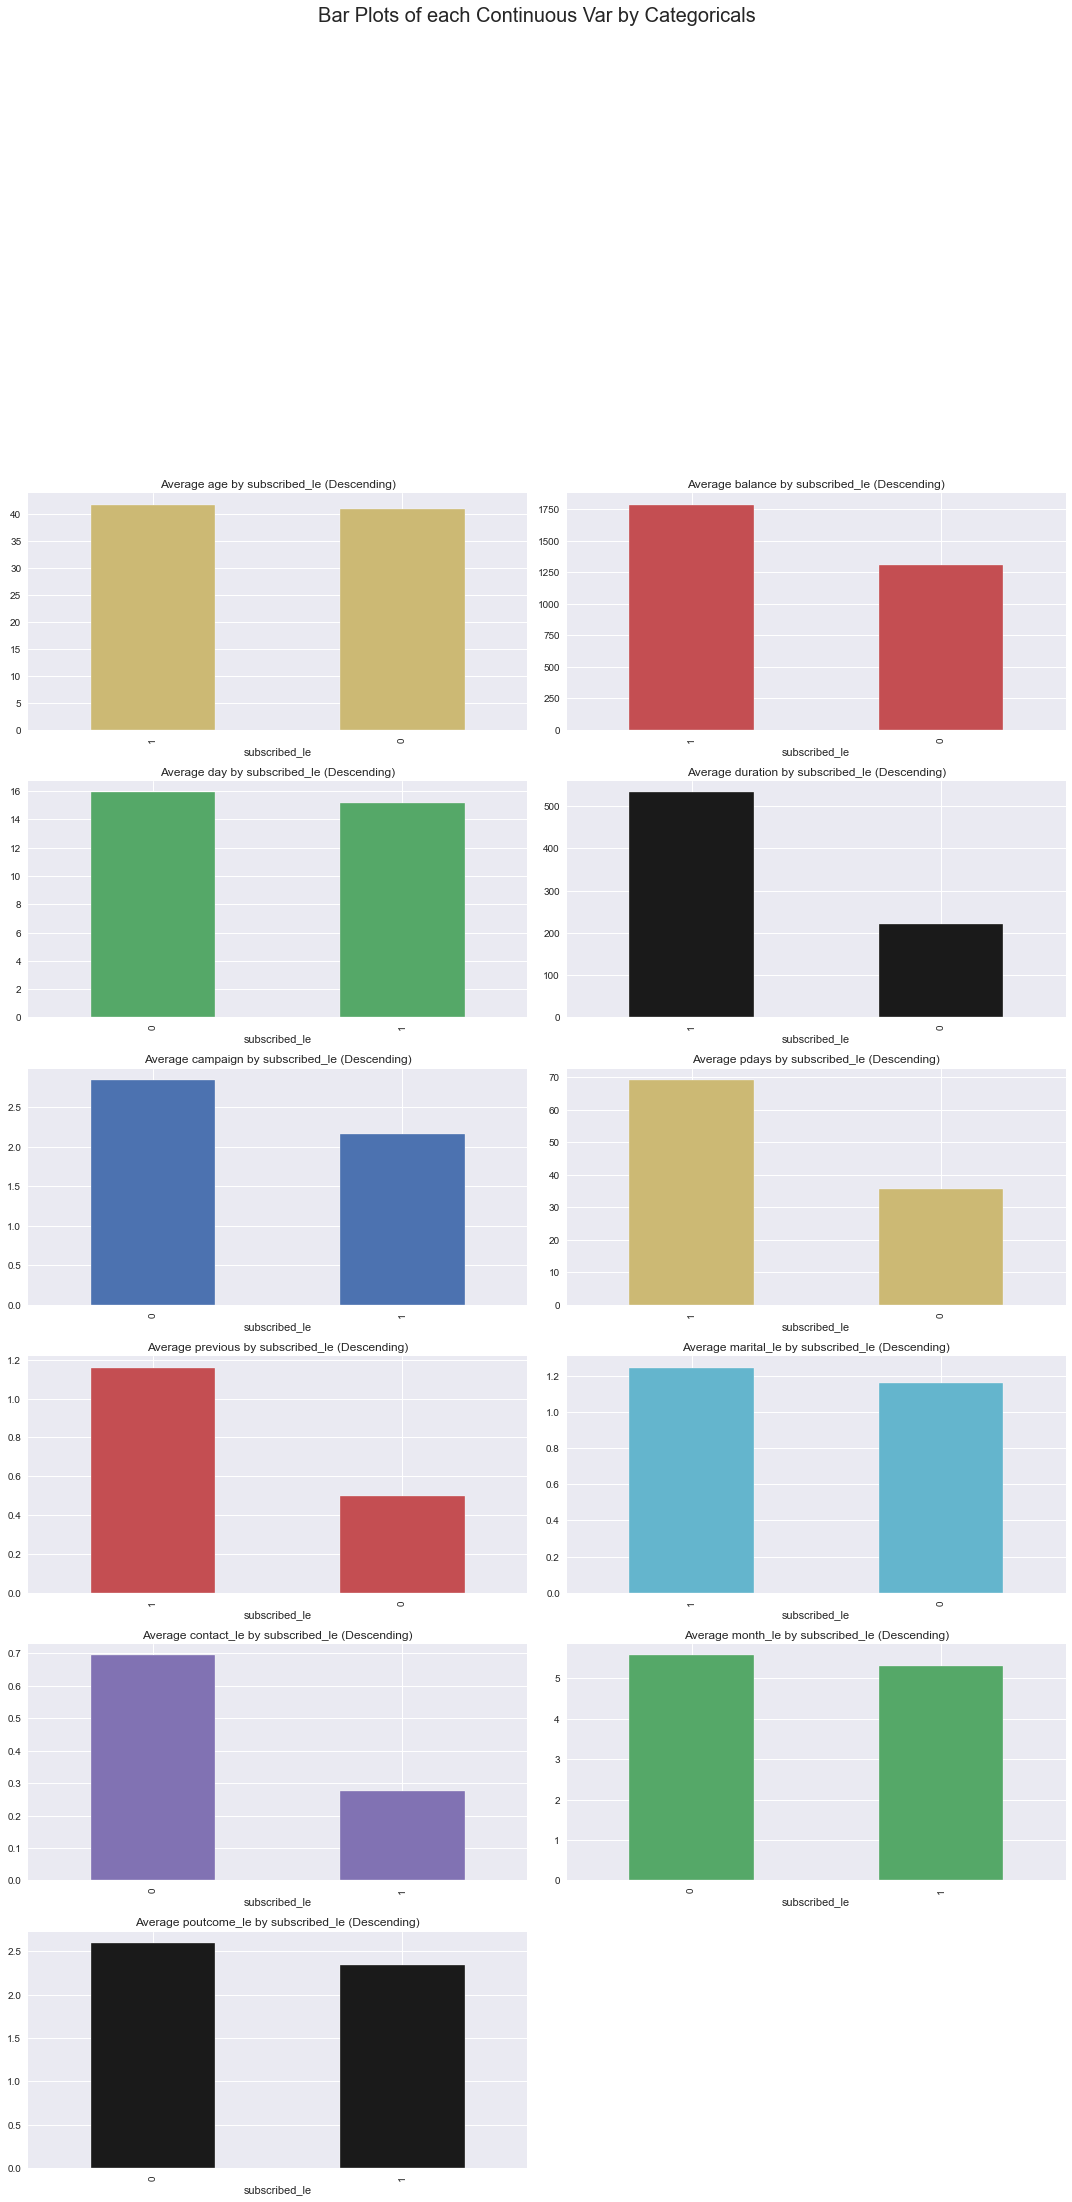

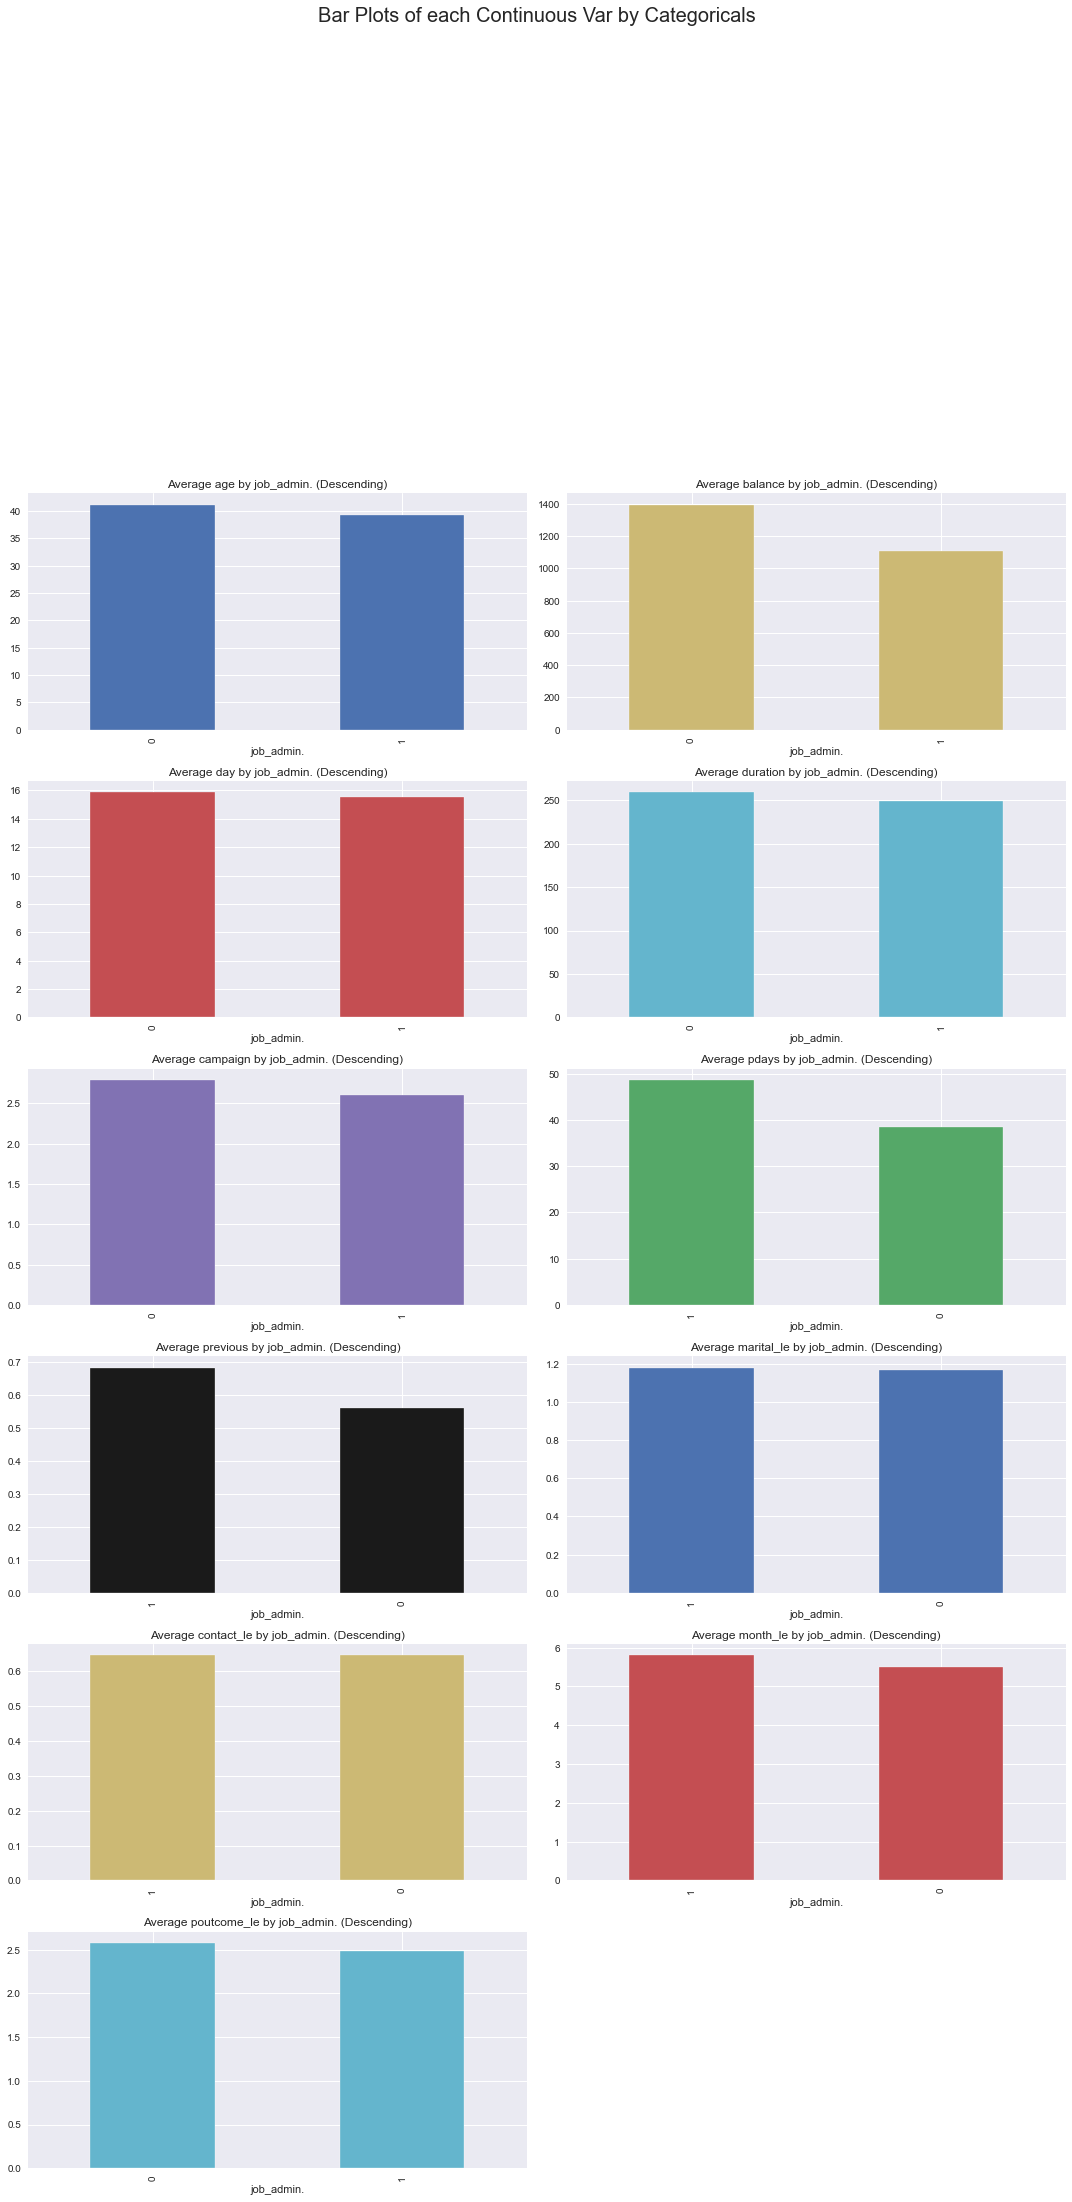

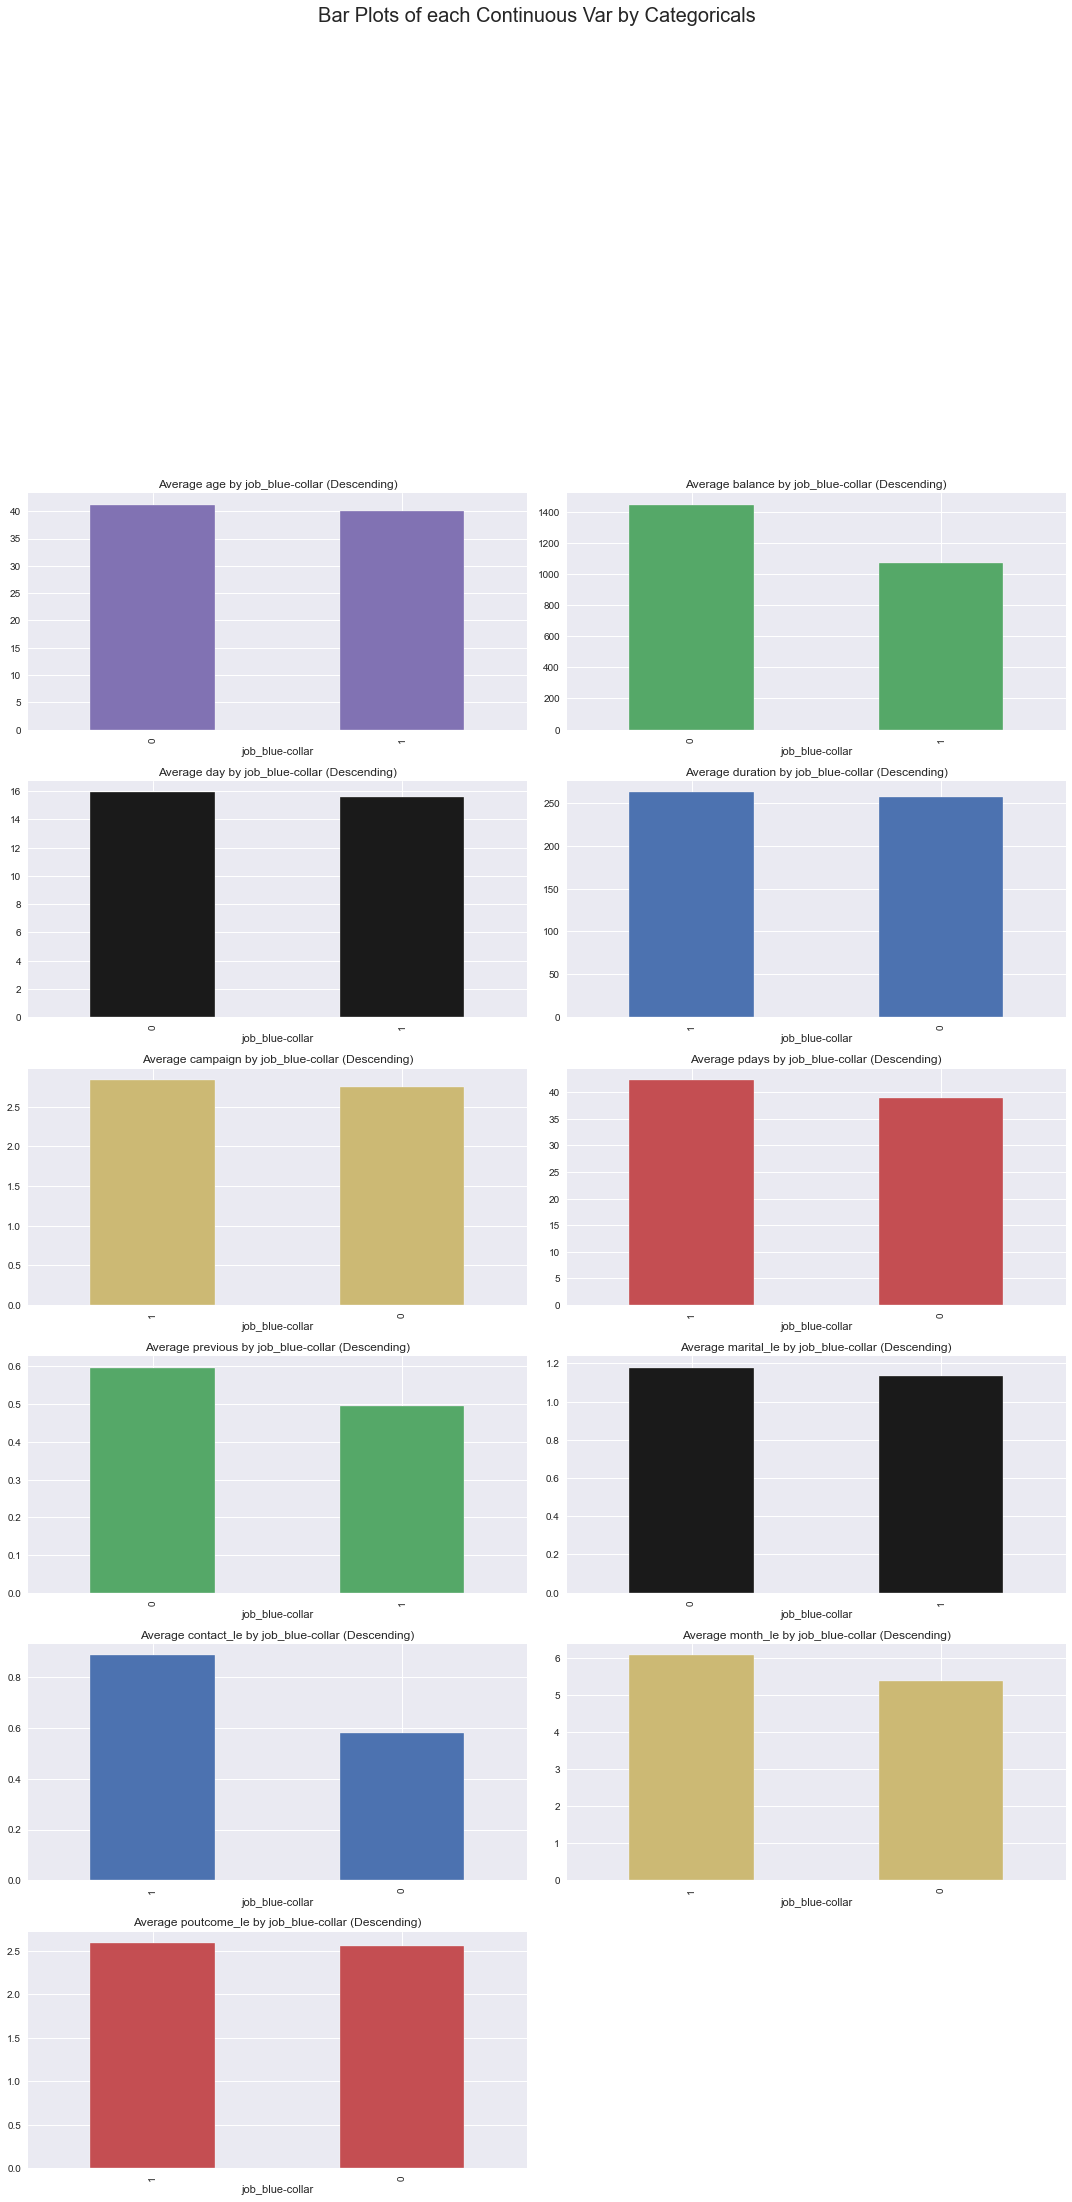

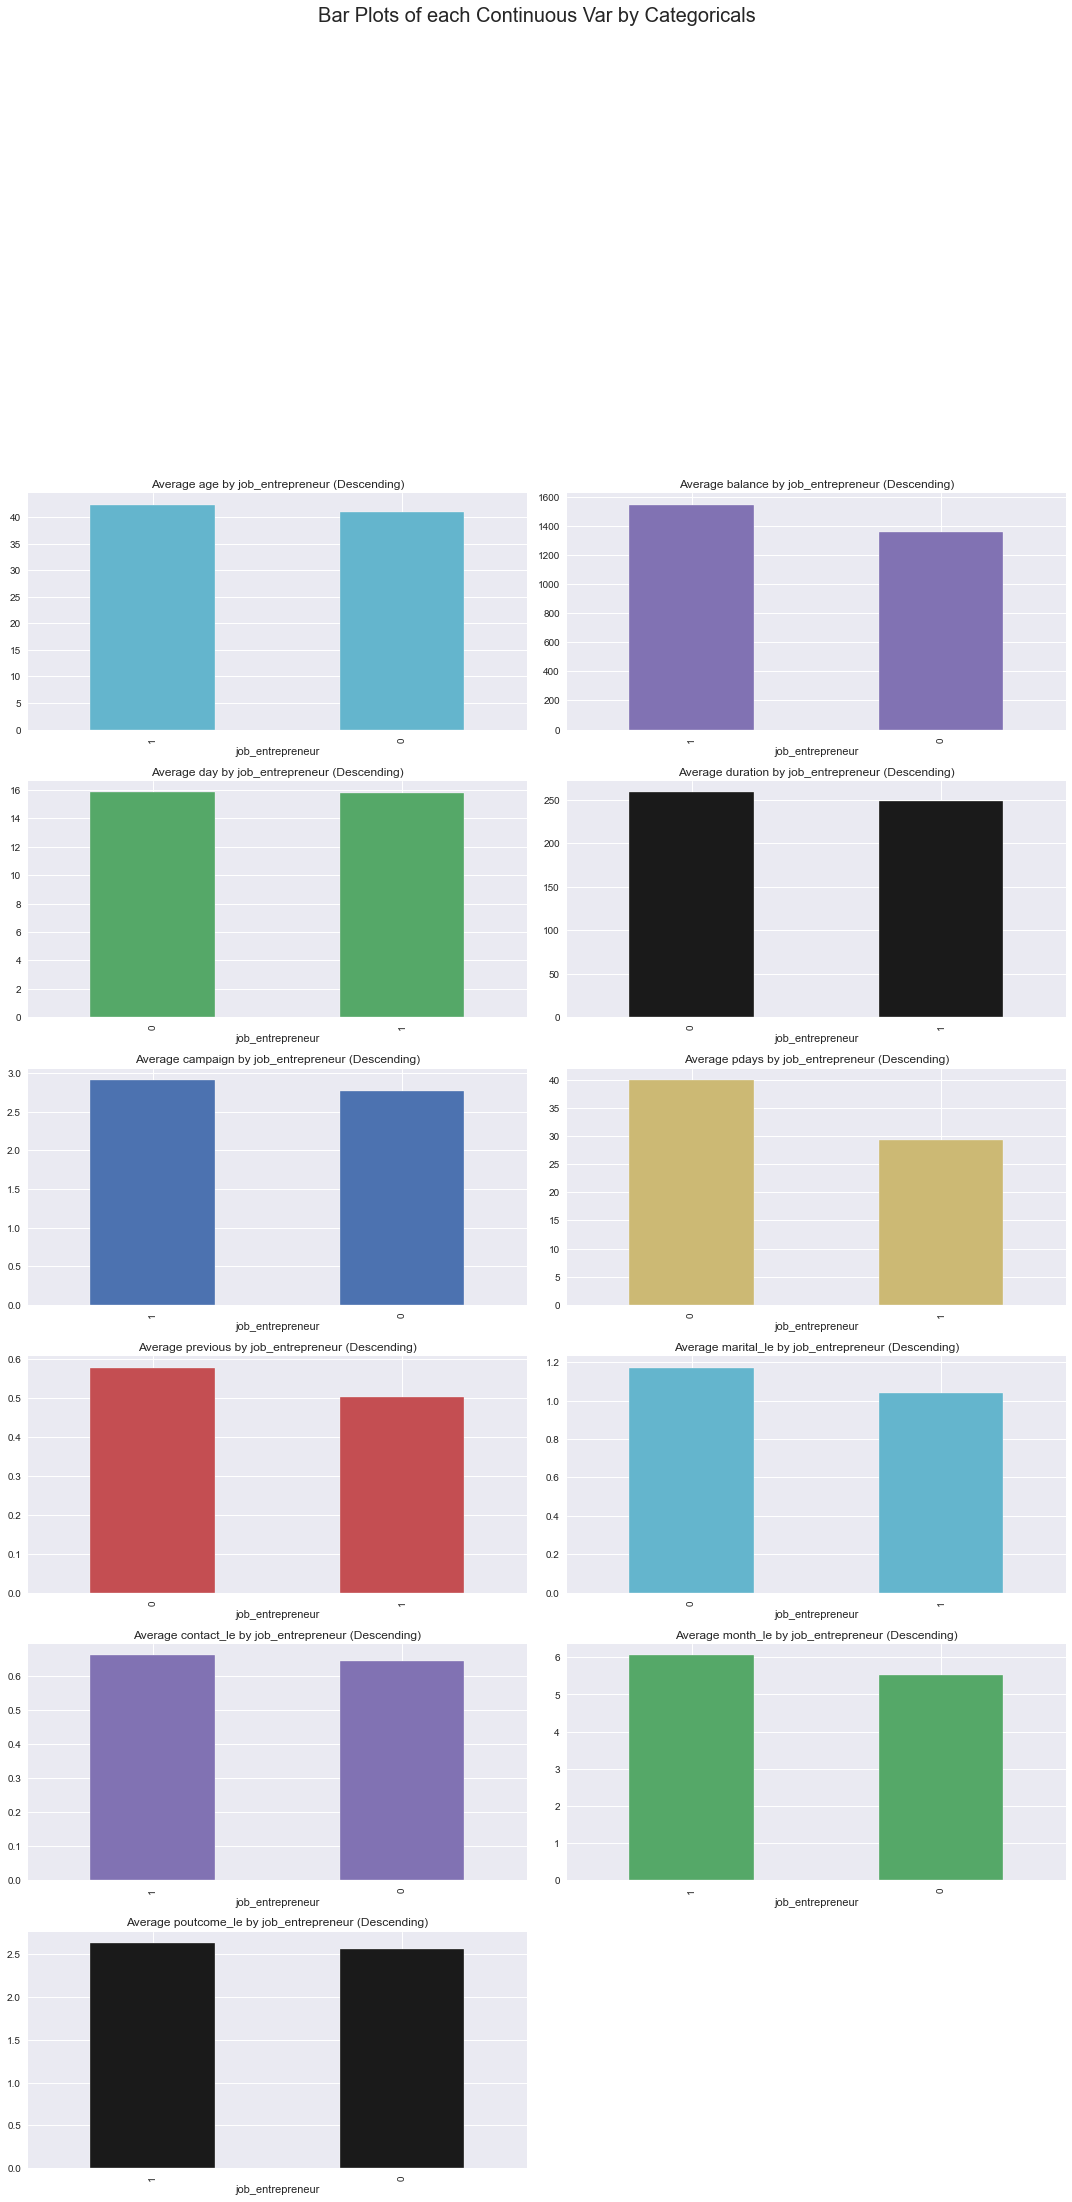

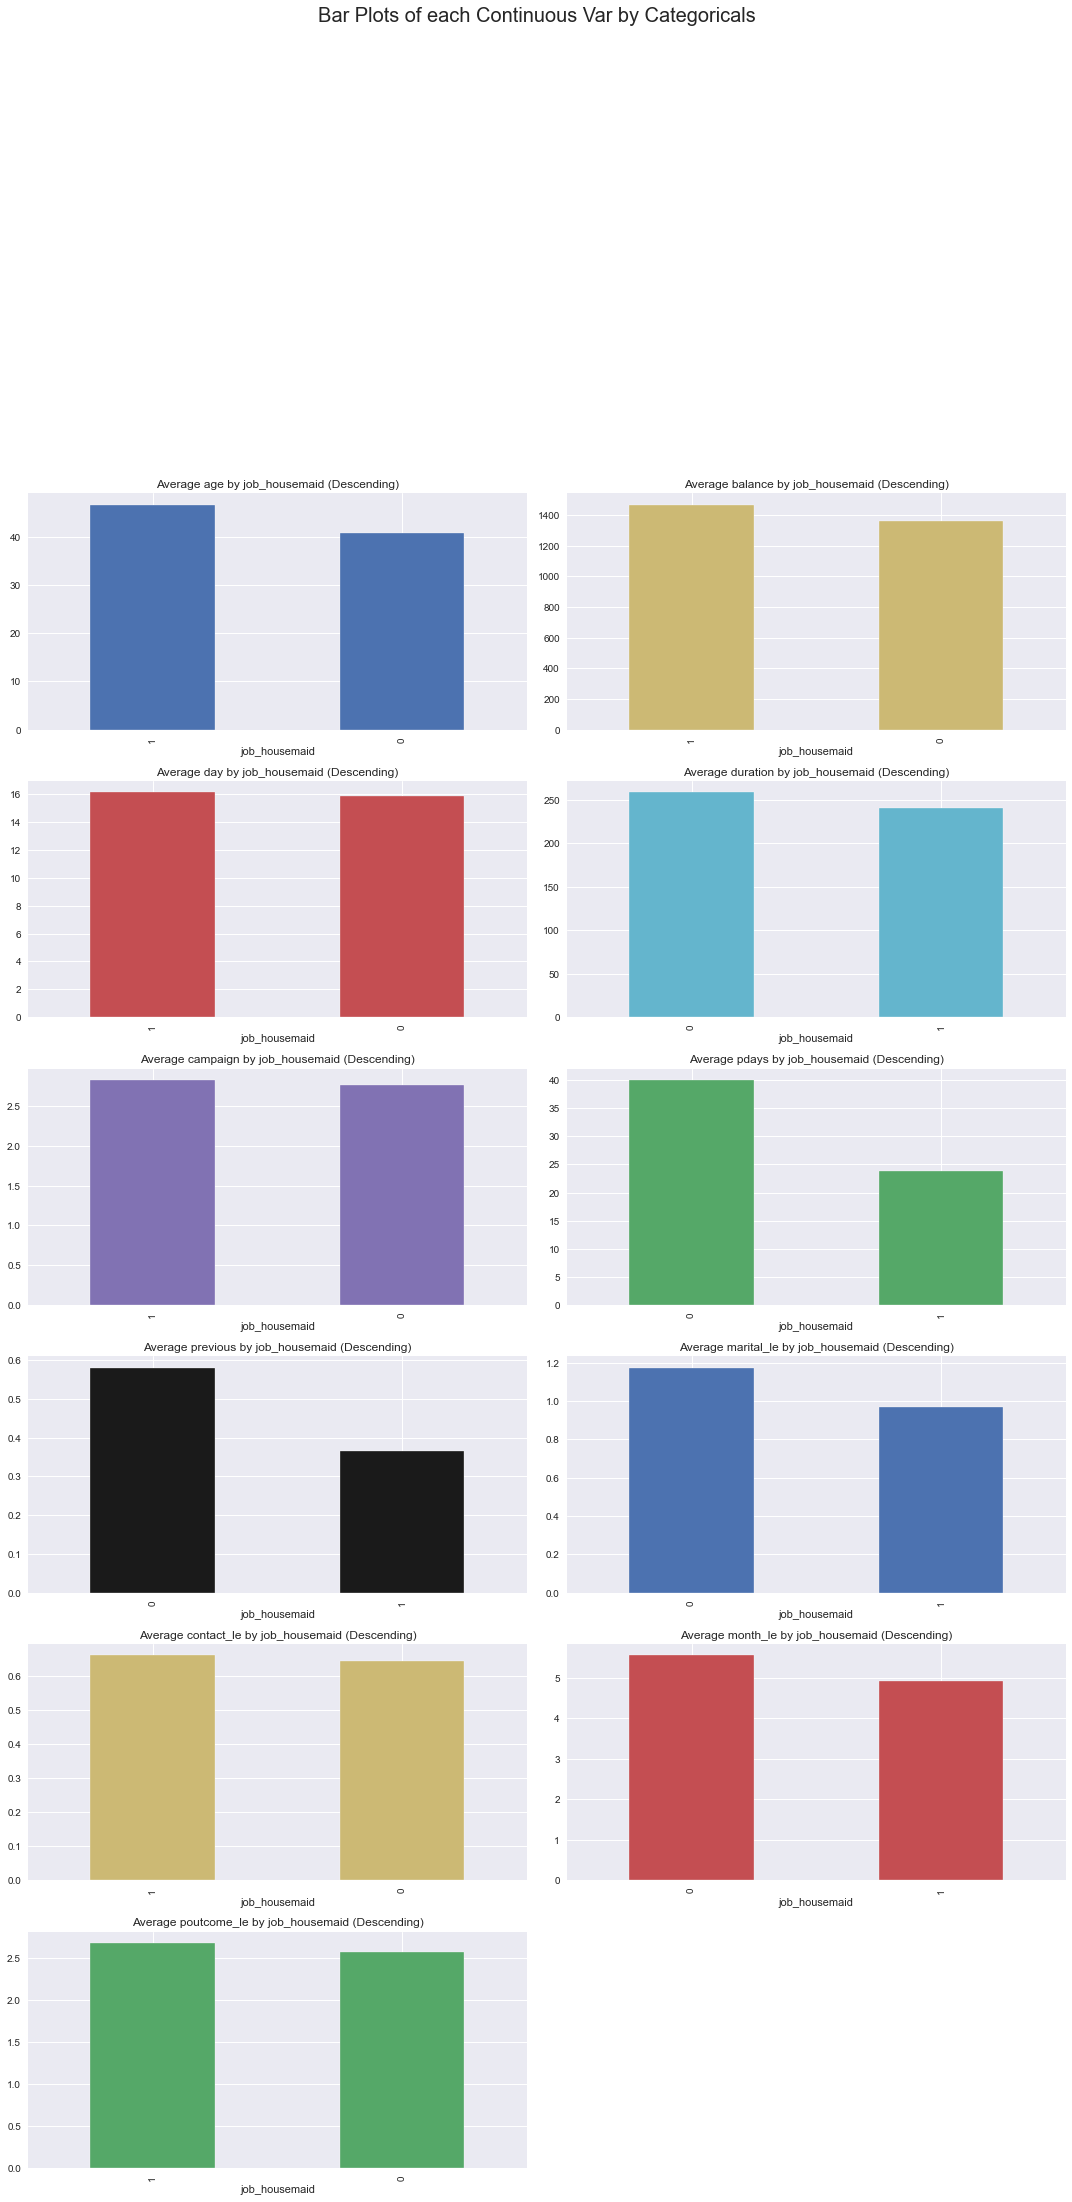

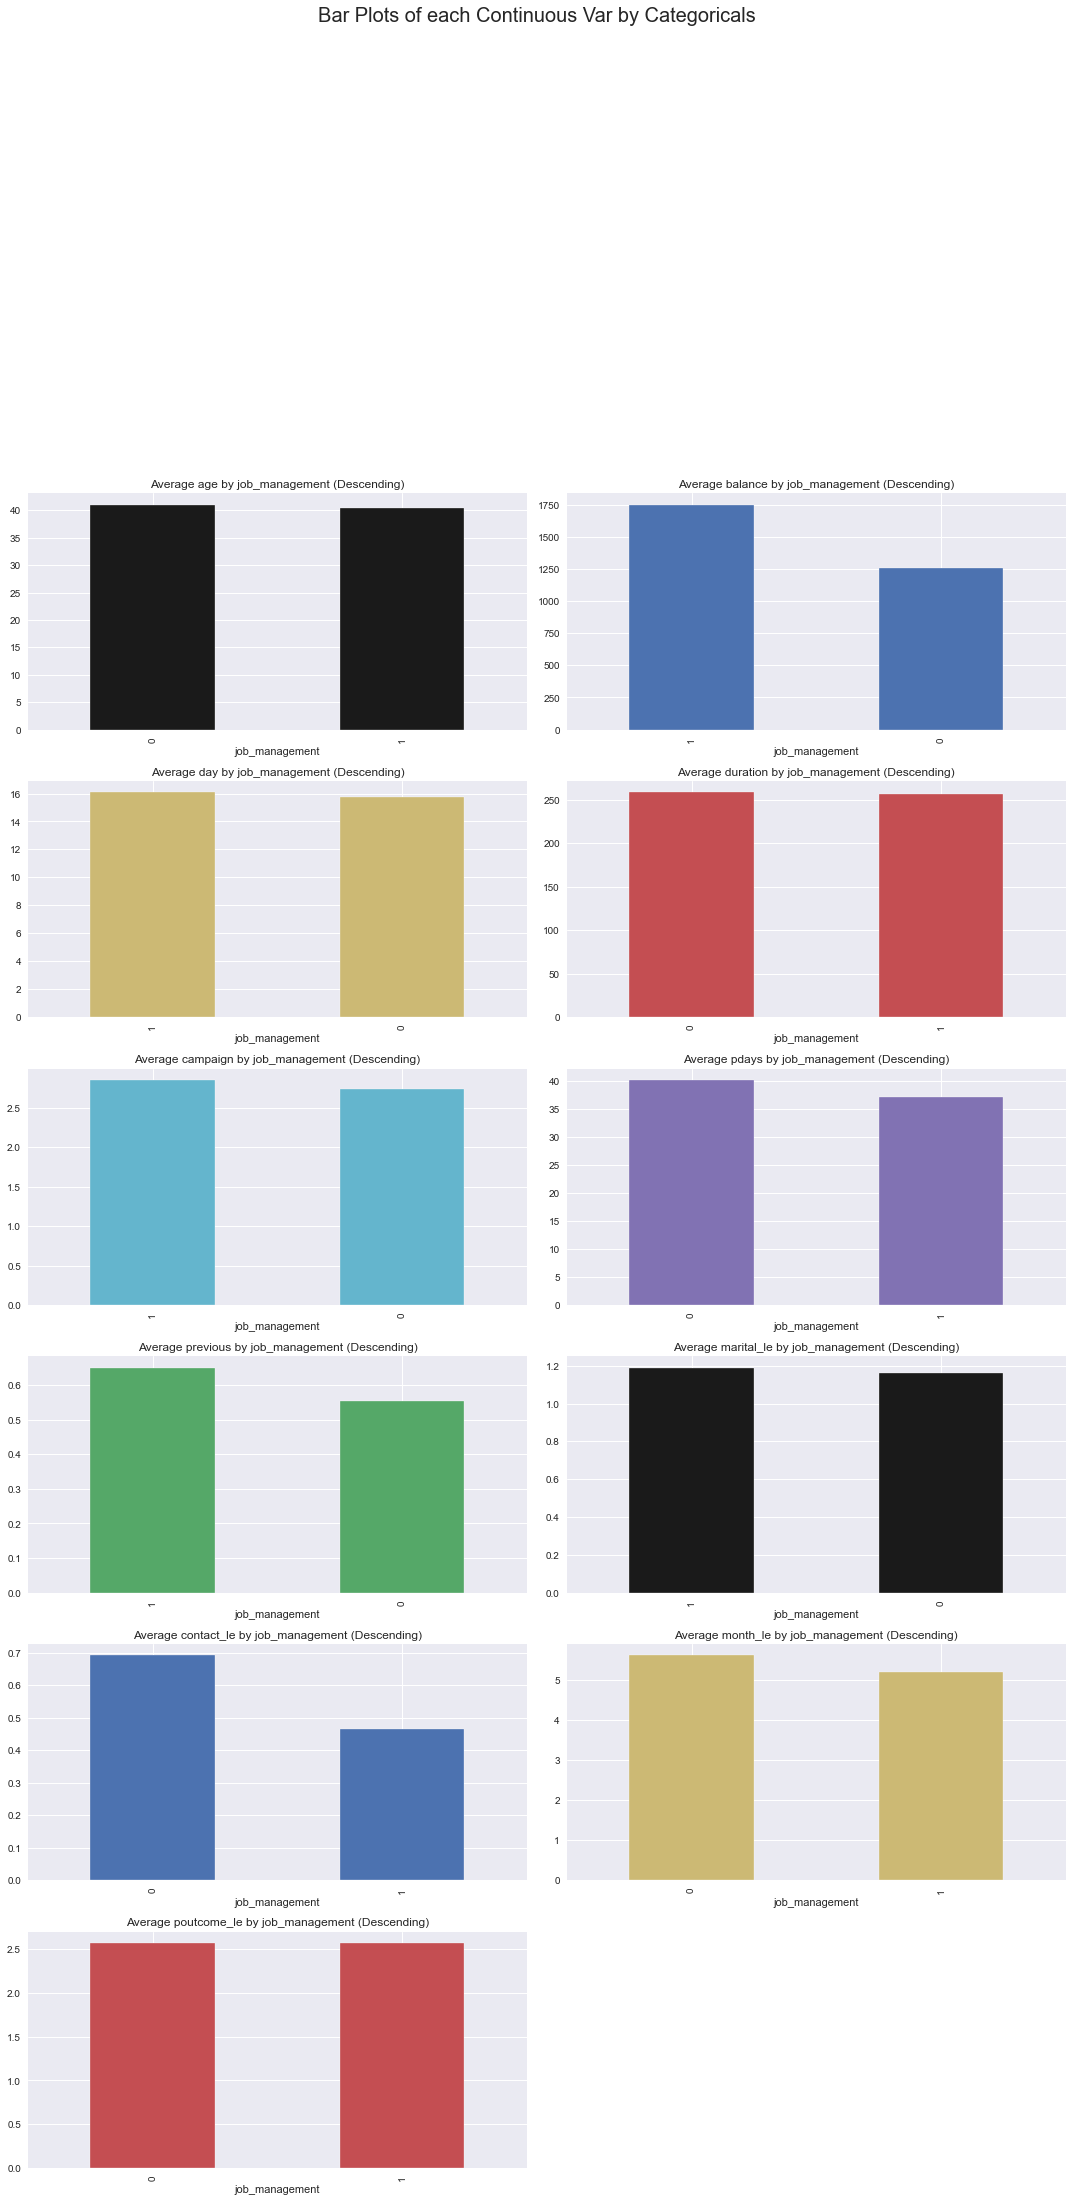

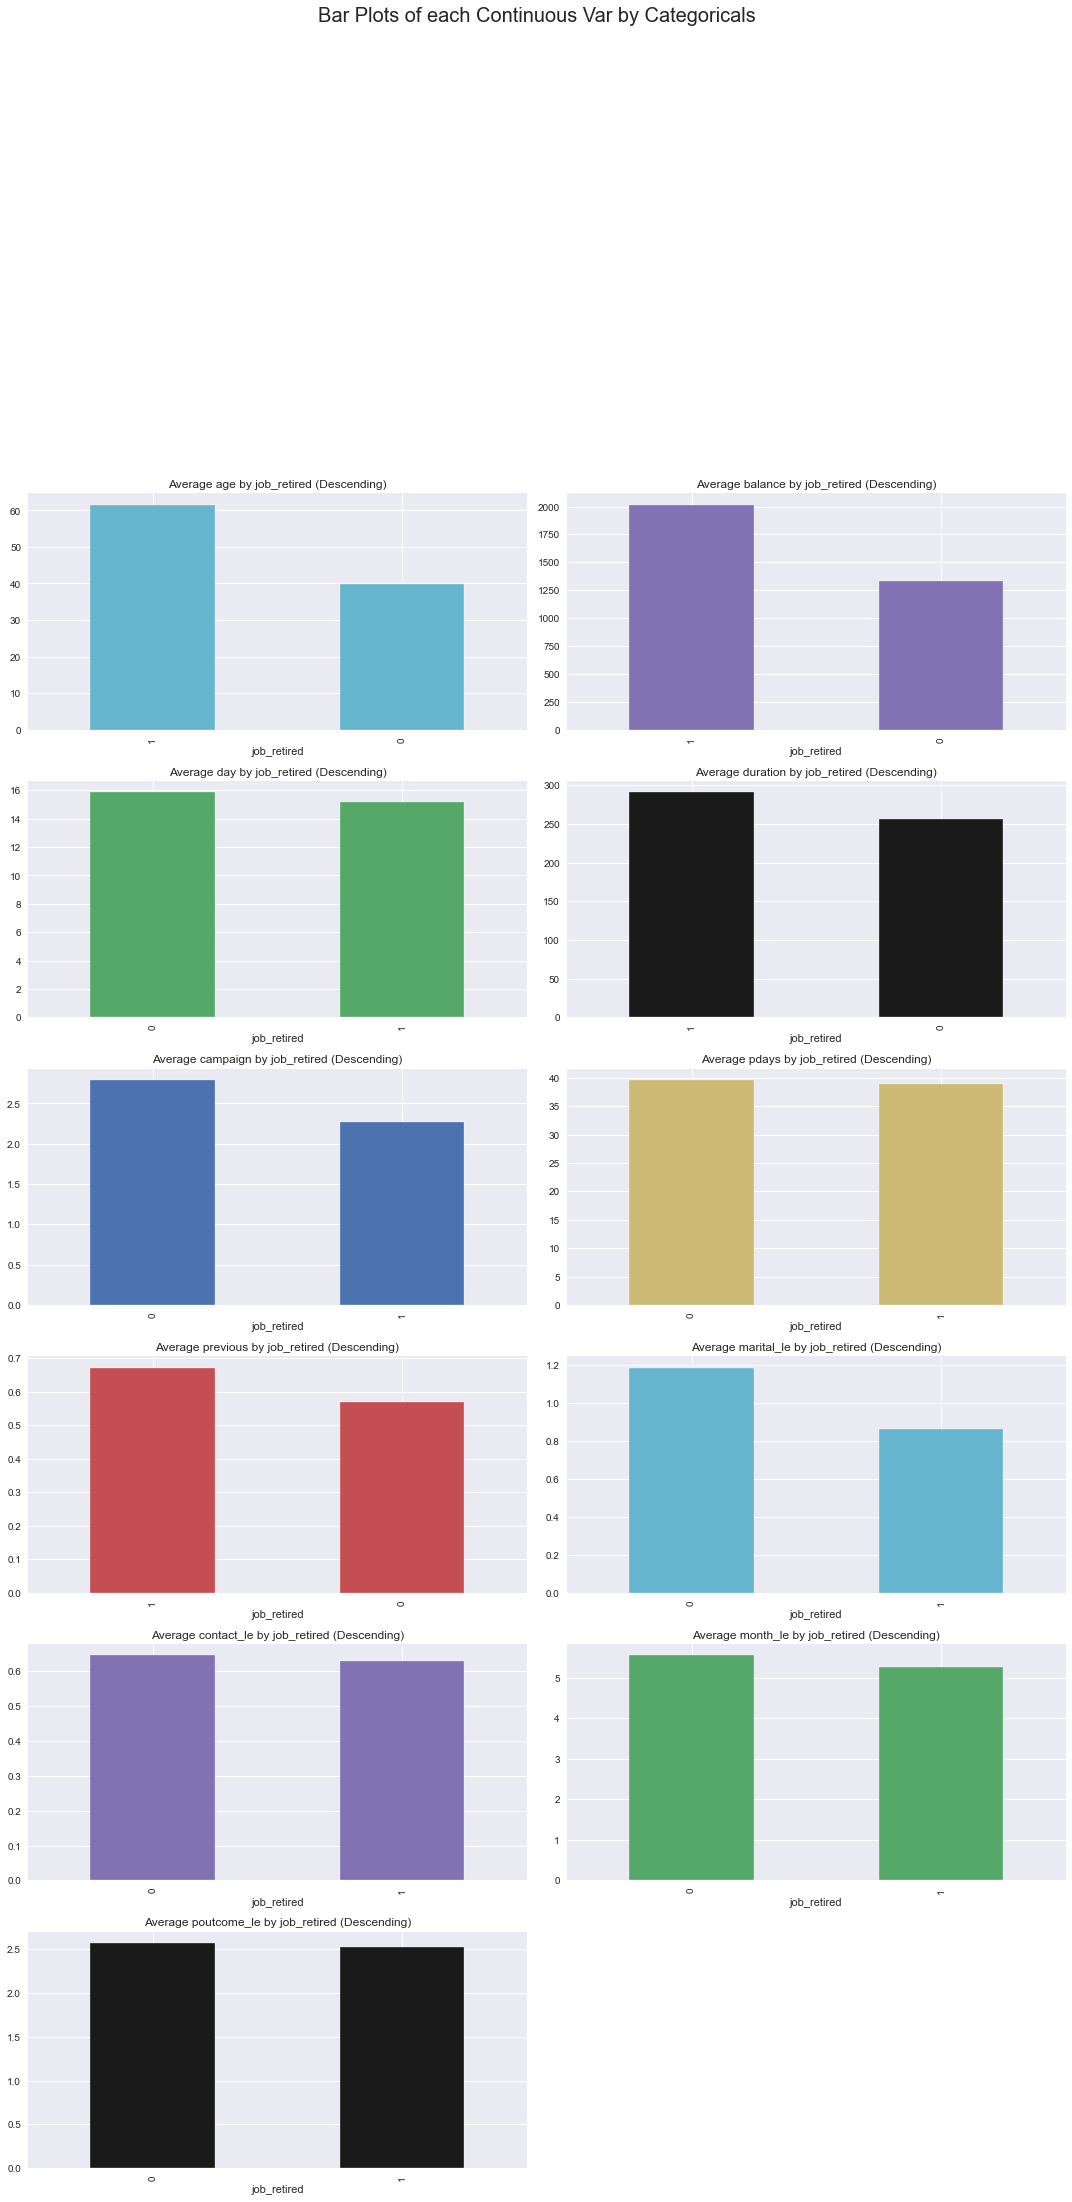

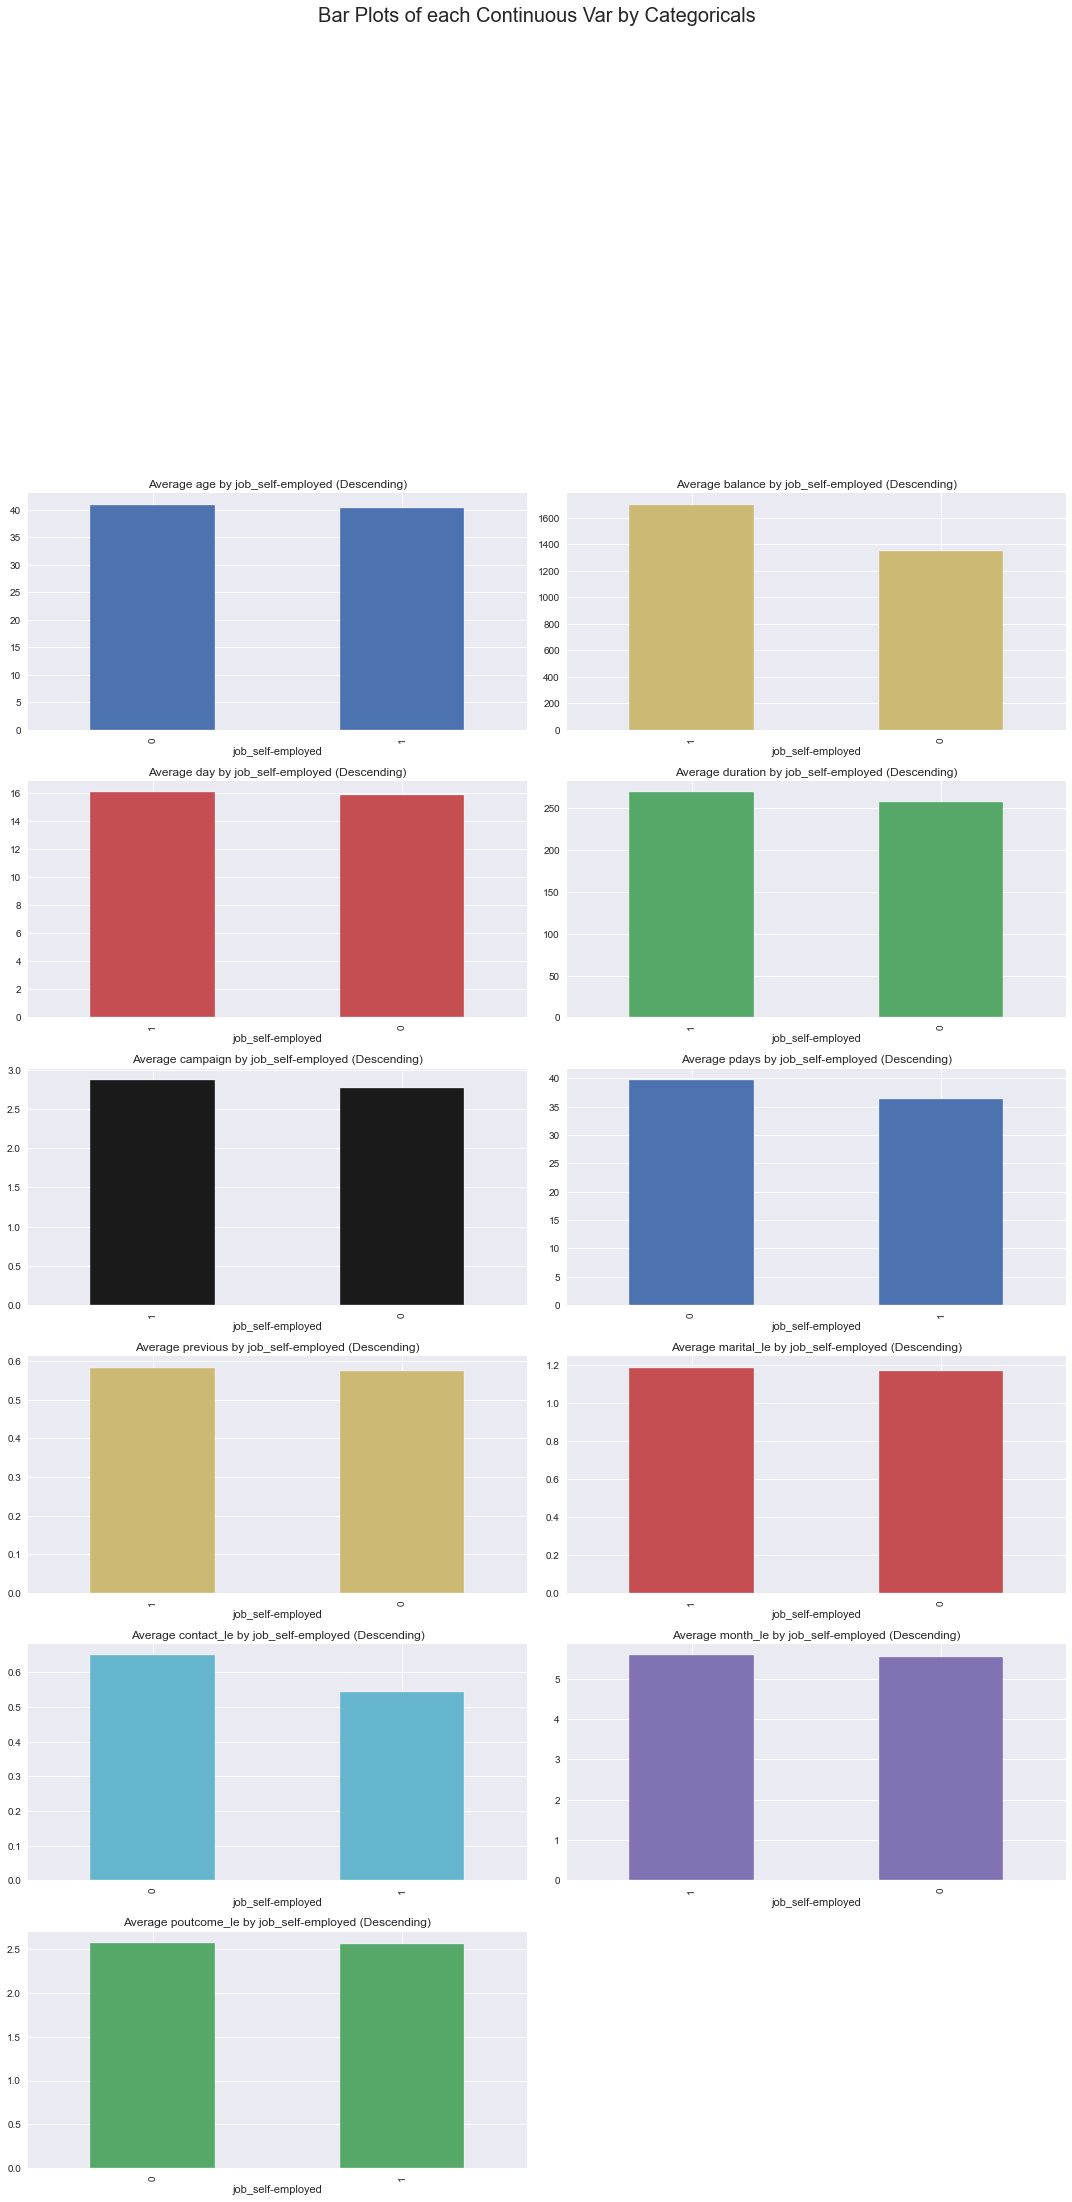

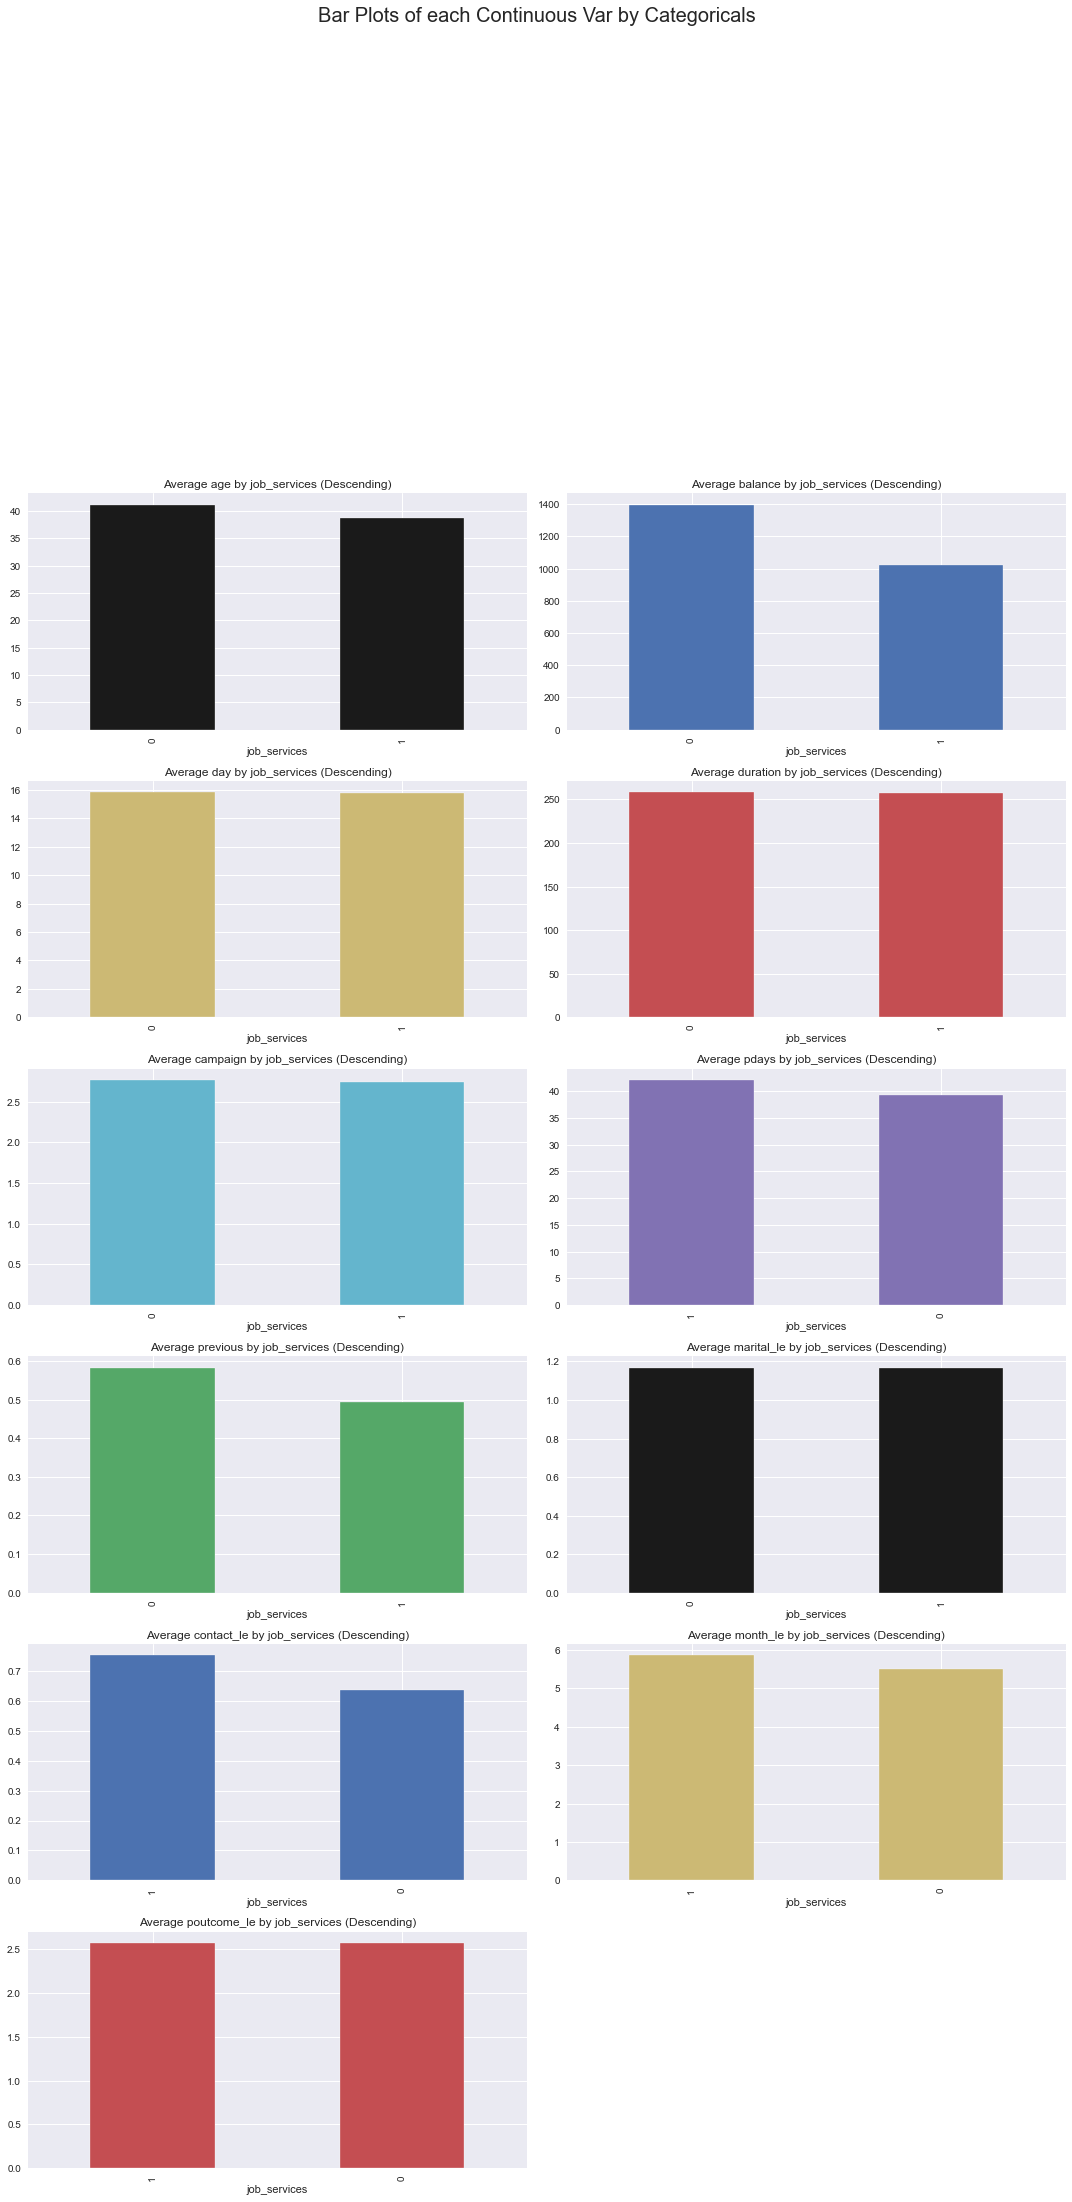

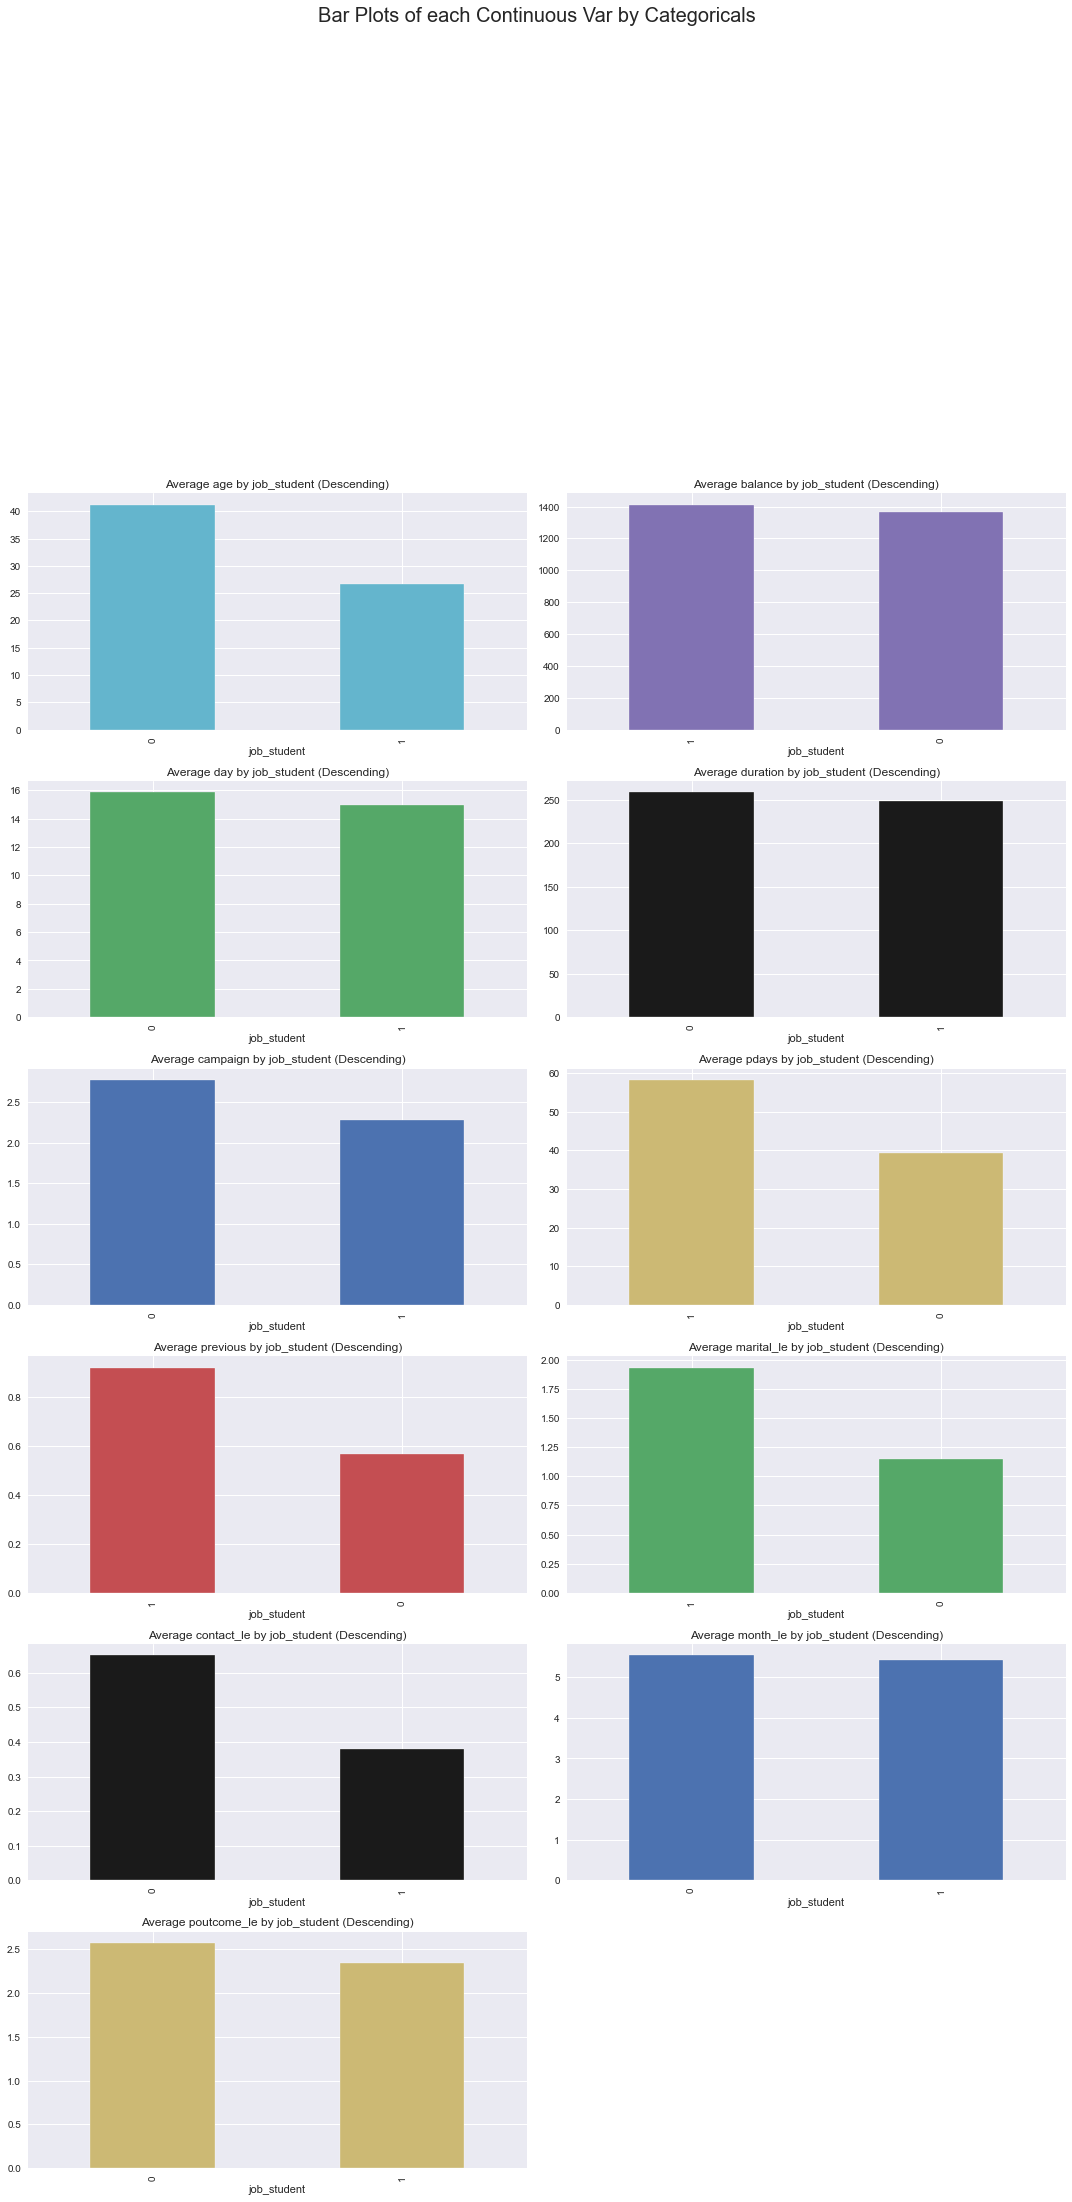

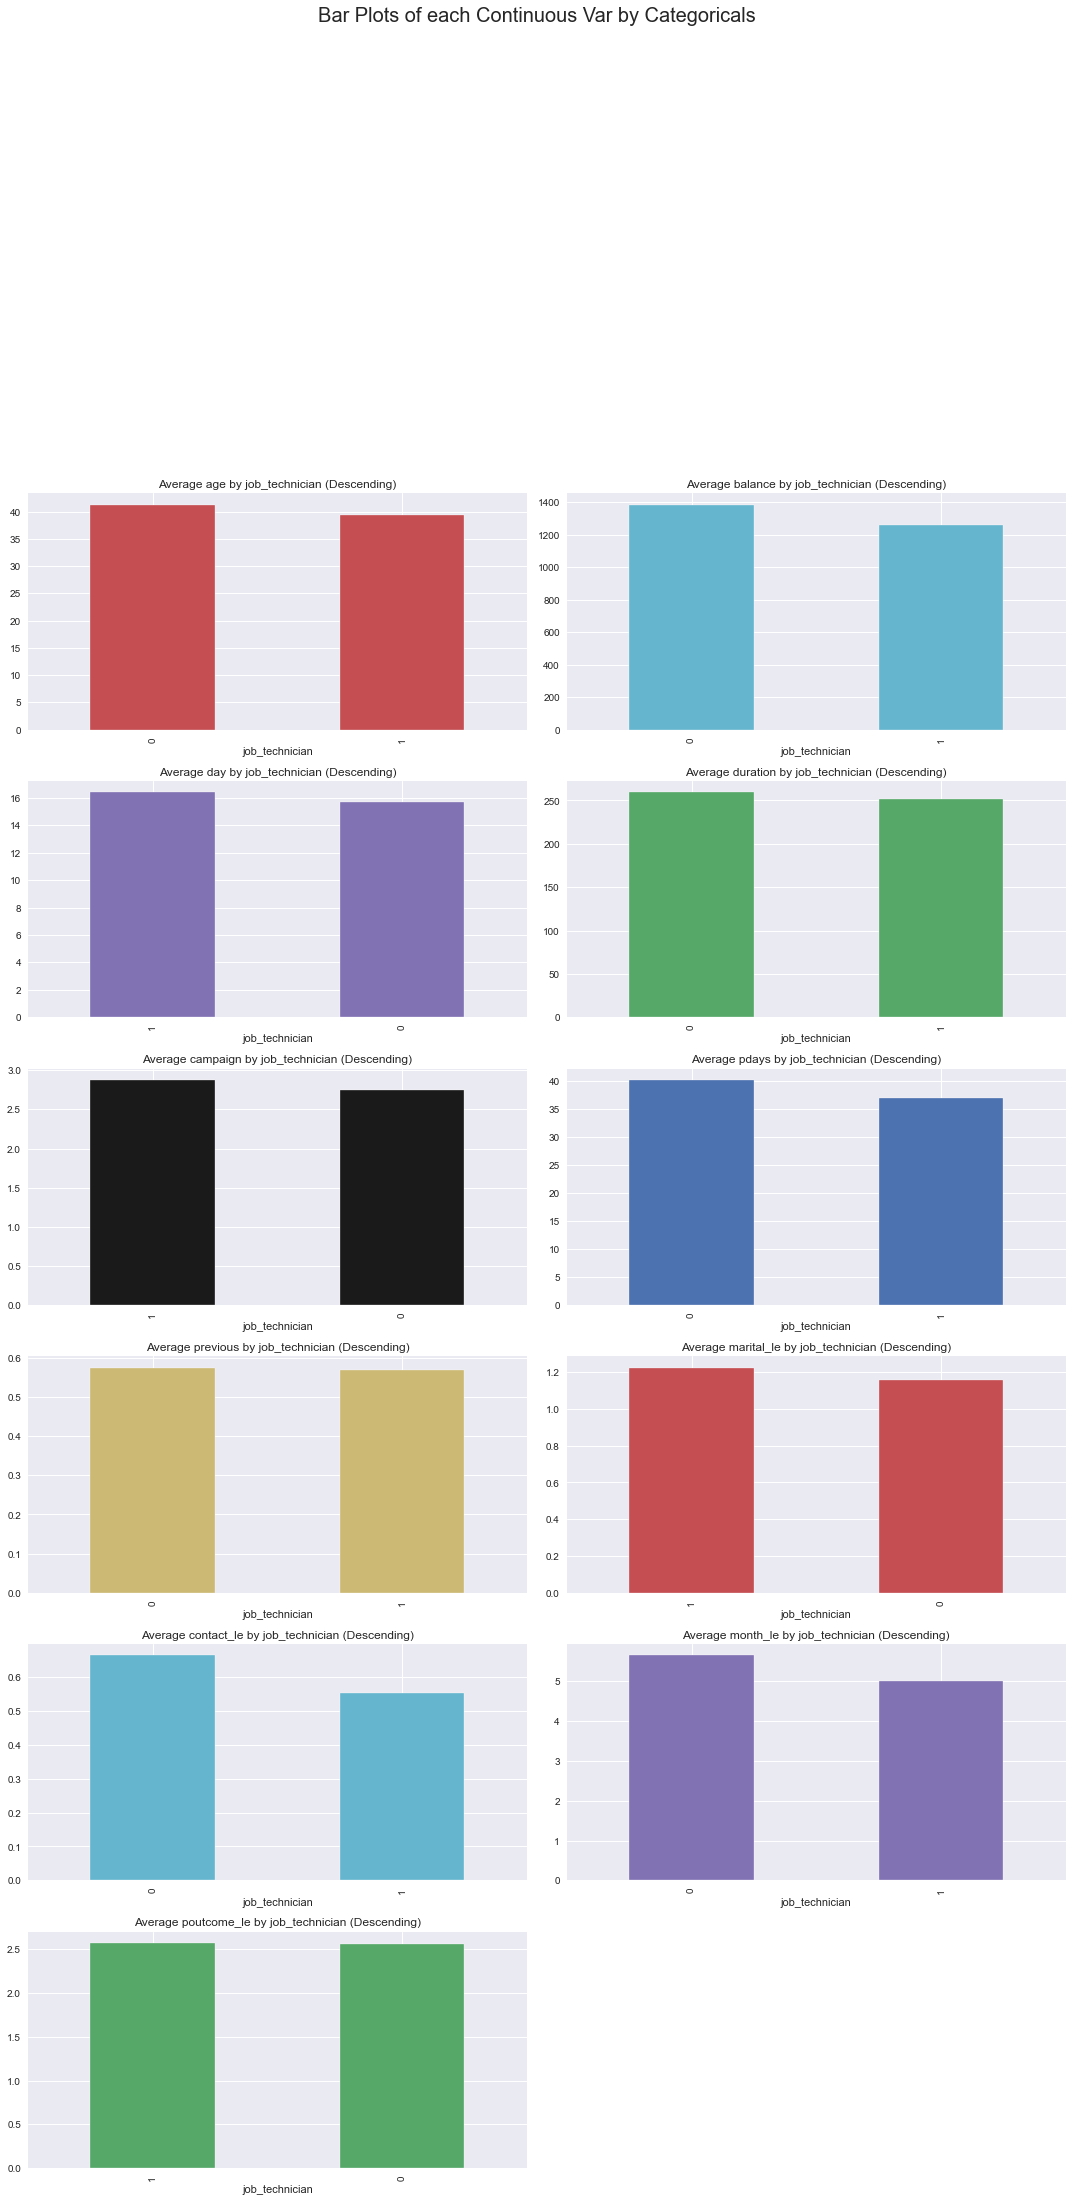

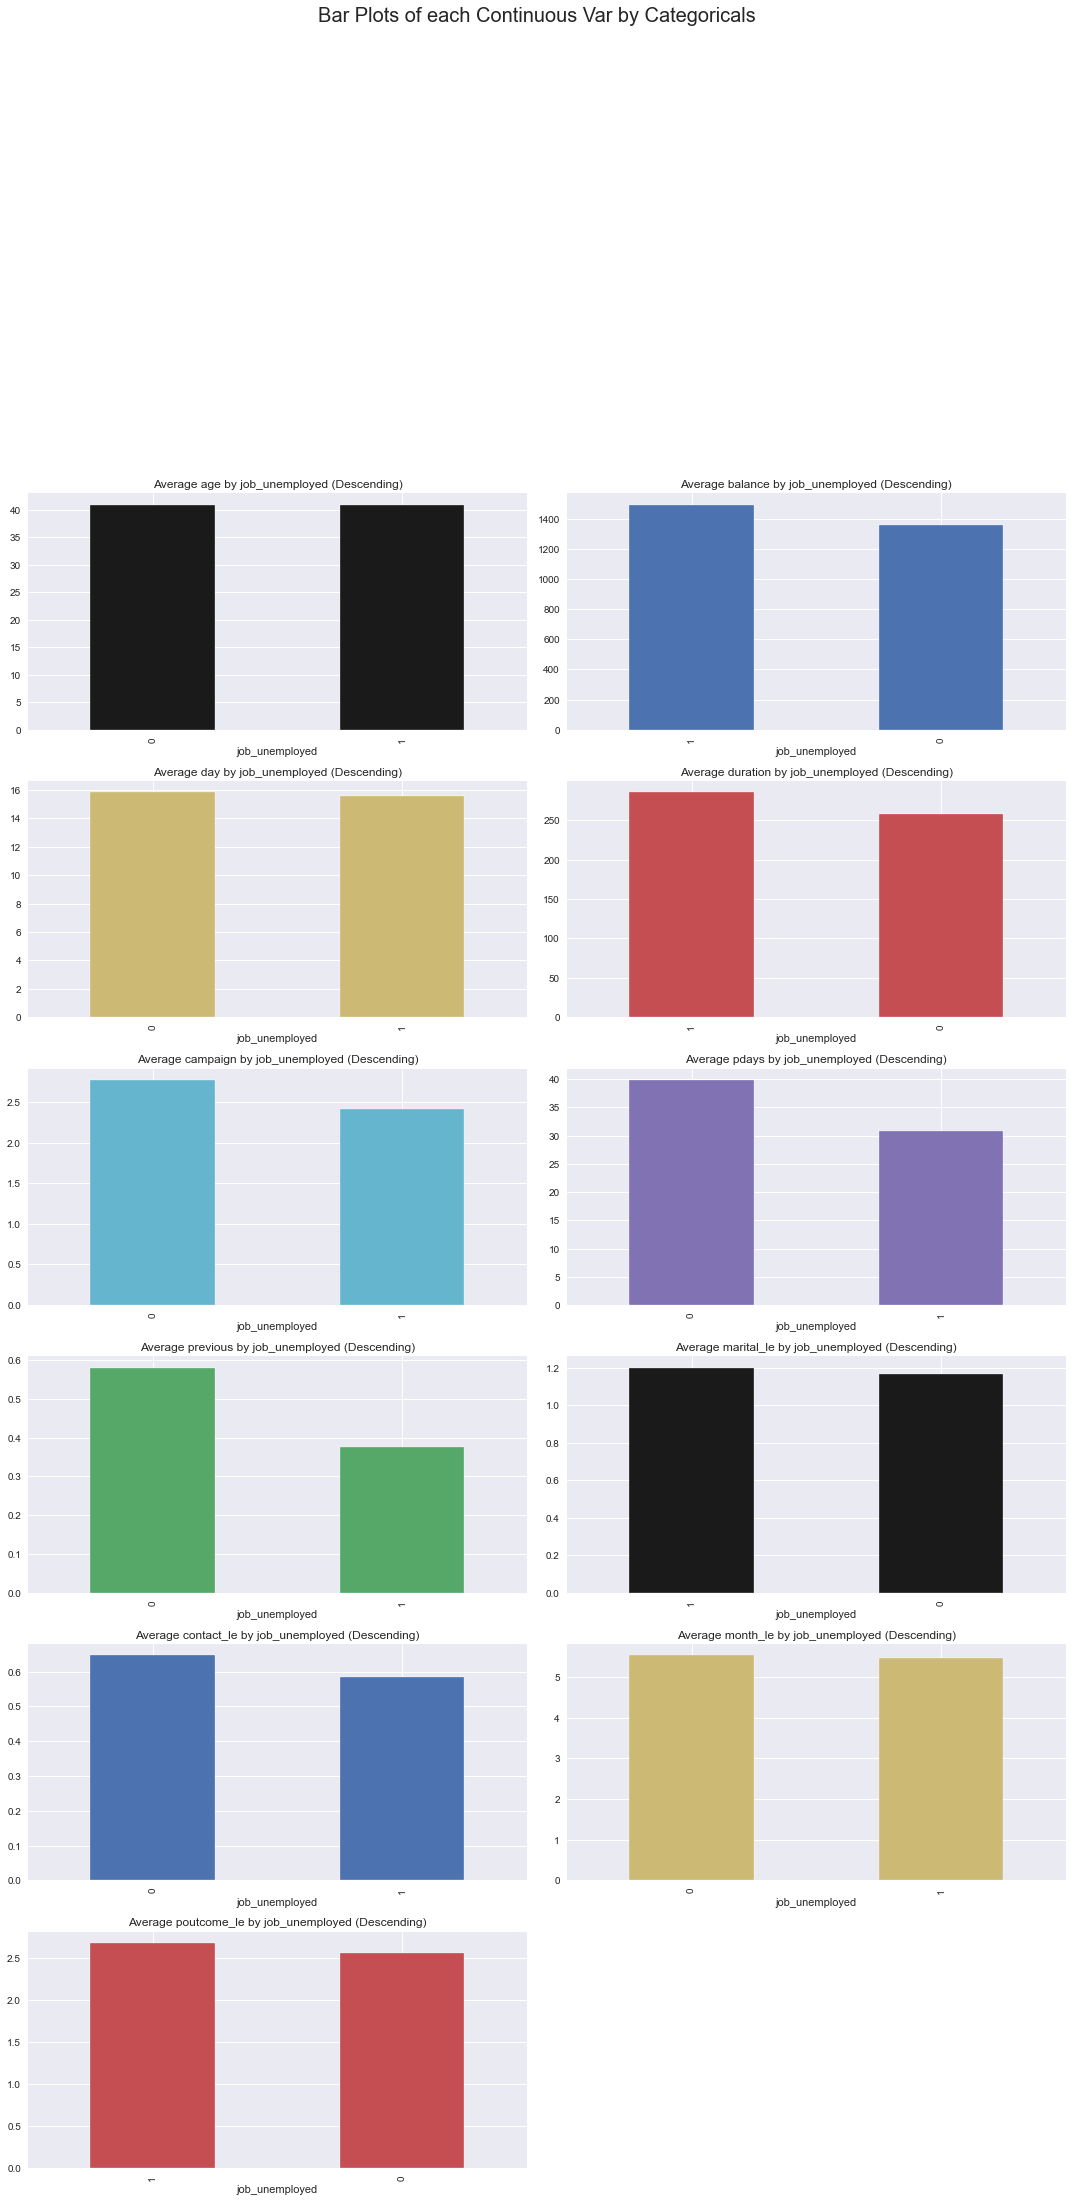

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz("Final_Train.csv")

In [ ]:
import sweetviz as sv

#EDA using Sweetviz
sweet_report = sv.analyze(pd.read_csv("Final_Train.csv"))

#Saving results to HTML file
sweet_report.show_html('sweetviz_report.html')


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
from pandas_profiling import ProfileReport

#EDA using pandas-profiling
profile = ProfileReport(pd.read_csv('Final_Train.csv'), explorative=True)

#Saving results to a HTML file
profile.to_file("output.html")

In [ ]:
joblib.dump(dt_final_le,"final_tran_dt.pkl")

In [ ]:
fin_dt = drive.CreateFile({'parents':[{u'id': '1FRi2c6DlbWX4Bmtxt18N1iDtlS1UcgdM'}]})
fin_dt.SetContentFile('final_tran_dt.pkl')
fin_dt.Upload() 

In [ ]:
loaded_fin_data=joblib.load("final_tran_dt.pkl")

In [ ]:
loaded_fin_data